In [2]:
import os
import copy
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set(style='whitegrid')

from interface import Calibrator, DefaultCalibrator, mass_calibration, mass_calibration_with_default, analyze_models_for_item
from data import date_handler, today, test_dates, ios, swap, germany, france, italy
from calibration import squared, relative_squared
from curve import LinearCurve, QuadraticCurve, CubicCurve, CubicSplineCurve
from pricer import SimplePricer
from derivative import Cap
import time

# RNG Seeding
gen_seed, opt_seed = 42, 89453934320

# Models to be run
models = [(0, 1), (1, 1), (0, 2), (1, 2), (2, 2), (1, 3), (0,3), (2, 3), (3, 3), (3, 4), (2, 4), (4, 5)]
results = {}
def_results = {}

location_of_pickled_data = 'C:/Users/Miikka/PycharmProjects/gradu/'

# Change to True if you want the results to be run
ios_run = False
swap_run = False
germany_run = False
france_run = False
italy_run = False

# Difference function
use_straight_squared = False

if use_straight_squared:
    diff_fun = squared
    data_pickle = 'data.pickle'
    
else:
    diff_fun = relative_squared
    data_pickle = 'data_rel.pickle'

# Without default

# Open the old pickled data
if os.path.isfile(location_of_pickled_data + data_pickle):
    with open(location_of_pickled_data + data_pickle, 'rb') as f:
        results = pickle.load(f)
        
def picked_save(location, pickle_file, results):
    
    with open(location + pickle_file, 'wb') as f:
        pickle.dump(results, f)

# Run the calibrations
if ios_run:

    key, data = 'ios', ios

    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=results, models=models)
    
    picked_save(location_of_pickled_data, data_pickle, results)
    
if swap_run:

    key, data = 'swap', swap

    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=results, models=models)
    
    picked_save(location_of_pickled_data, data_pickle, results)
    
if germany_run:

    key, data = 'germany', germany

    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=results, models=models)
    
    picked_save(location_of_pickled_data, data_pickle, results)
    
if france_run:

    key, data = 'france', france

    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=results, models=models)
    
    picked_save(location_of_pickled_data, data_pickle, results)
    
if italy_run:

    key, data = 'italy', italy

    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=results, models=models)
    
    picked_save(location_of_pickled_data, data_pickle, results)


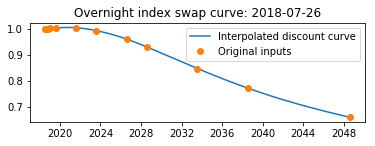

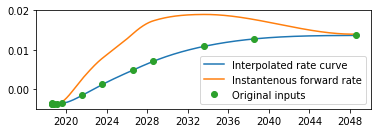

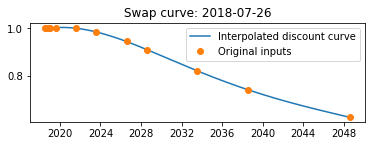

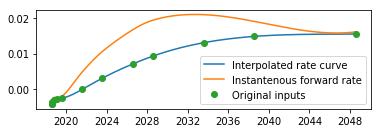

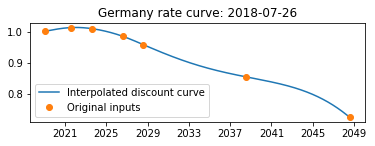

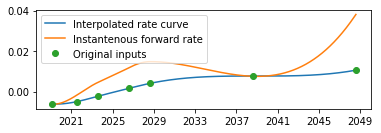

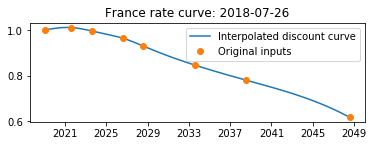

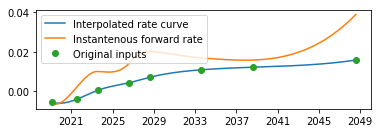

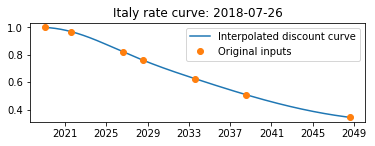

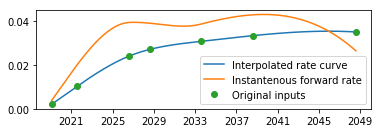

In [2]:
for item in [ios, swap, germany, france, italy]:
    item.plot()

In [28]:
def get_modified_results(results):

    mod_results = {}
    for item in results:
        mod_results[item] = {}
        for model in results[item]:
            model_name = f'A({model[0]}, {model[1]})+'
            mod_results[item][model_name] = {}
            param = results[item][model]['param']
            for key in param:
                if key not in ('M', 'N', 'delta'):
                    value = param[key]
                    if isinstance(value, np.ndarray):
                        if value.shape == (1,):
                            value = value[0]
                    if key == 'shift':
                        key2 = 'delta'
                    else:
                        key2 = key
                    if key == 'risk_free':
                        break

                    if key == 'rho':
                        if value.shape == (2,2):
                            value = value[0,1]
                        elif value.shape == (3,3):
                            value = [value[0,1], value[0,2], value[1,2]]
                    mod_results[item][model_name][key2] = np.round(value, 3)
                    
    return mod_results

mod_results = get_modified_results(results)


In [3]:
print(pd.DataFrame(mod_results['france']).to_latex(na_rep=''))

\begin{tabular}{lrrlrllllllll}
\toprule
{} &  A(0, 1)+ &  A(1, 1)+ &          A(0, 2)+ &  A(1, 2)+ &        A(2, 2)+ &        A(1, 3)+ &                 A(0, 3)+ &        A(2, 3)+ &               A(3, 3)+ &               A(3, 4)+ &        A(2, 4)+ &                      A(4, 5)+ \\
\midrule
X\_0   &           &     0.016 &                   &     0.019 &   [0.02, 0.064] &           0.067 &                          &   [0.06, 0.002] &  [0.095, 0.001, 0.009] &  [0.002, 0.012, 0.043] &   [0.093, 0.07] &  [0.085, 0.062, 0.001, 0.049] \\
Y\_0   &    -0.049 &           &  [-0.088, -0.027] &    -0.010 &                 &   [-0.1, 0.084] &  [-0.036, 0.028, -0.087] &           0.034 &                        &                  0.032 &   [0.039, -0.1] &                        -0.099 \\
alpha &           &     0.159 &                   &     0.148 &  [2.999, 0.131] &             0.1 &                          &  [0.469, 0.005] &   [2.411, 1.31, 0.064] &   [0.012, 0.545, 2.65] &  [2.999, 0.134] &  

Running these calibrations took 24.48 minutes.
Absolute relative errors by models:
3  4    0.122198
1  2    0.266754
0  3    0.276932
2  2    0.291051
1  3    0.291413
2  3    0.314025
3  3    0.329254
4  5    0.338240
0  2    0.360297
1  1    0.367171
2  4    0.379554
0  1    0.410955
dtype: float64
Running these calibrations took 24.15 minutes.
Absolute relative errors by models:
3  4    0.057677
0  2    0.301078
2  3    0.302289
   4    0.302495
0  3    0.306433
1  2    0.310770
3  3    0.311092
4  5    0.315005
1  3    0.317000
2  2    0.320561
1  1    0.431611
0  1    0.439534
dtype: float64
Running these calibrations took 14.48 minutes.
Absolute relative errors by models:
2  4    0.237347
1  2    0.238984
3  3    0.243045
1  3    0.251787
0  2    0.288282
3  4    0.296440
0  1    0.389660
1  1    0.400784
2  3    0.417203
   2    0.422629
0  3    0.677111
dtype: float64
Running these calibrations took 63.94 minutes.
Absolute relative errors by models:
2  3    0.308647
0  3    0.3

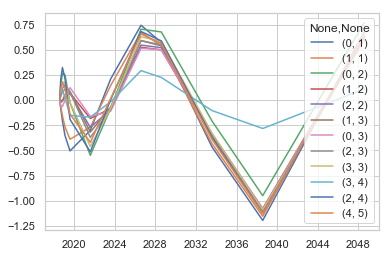

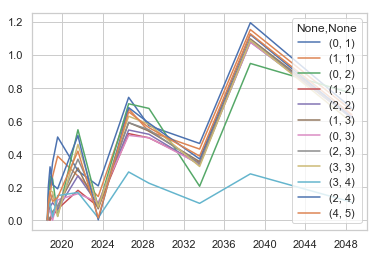

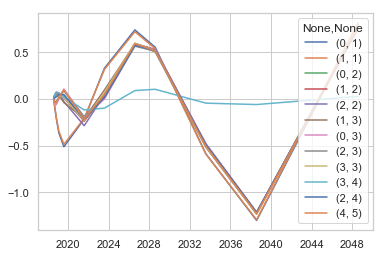

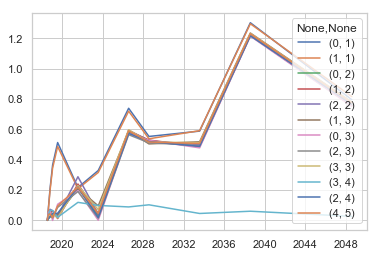

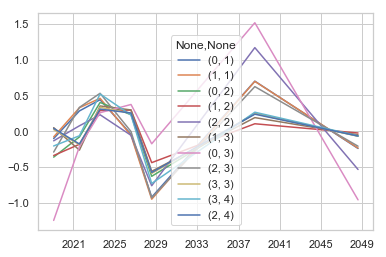

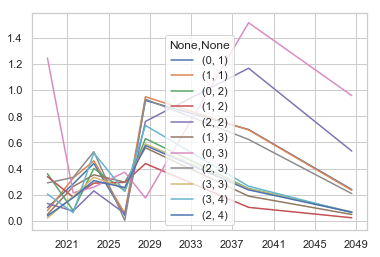

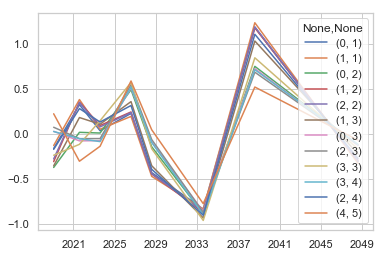

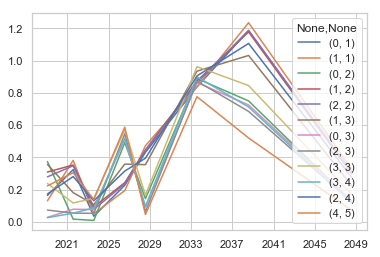

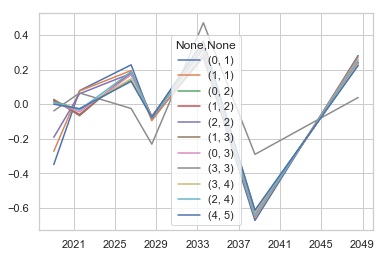

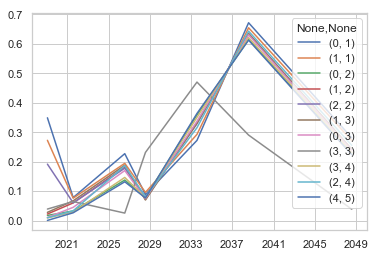

In [21]:
def renaming(string):
    if string == 'ios':
        return 'OIS'
    else:
        return string.capitalize()

def modify_result_data(results):

    relatives, absolutes = {}, {}
    relative_data, absolute_data = {}, {}
    for item in results:
        relative, absolute, param, durations = analyze_models_for_item(item, results)
        relatives[item] = np.round(relative.mean(), 2)
        absolutes[item] = np.round(absolute.mean(), 2)
        relative.columns = [ f'A({str(x[0])}, {str(x[1])})+' for x in relative.columns]
        relative_data[item] = relative.astype(float).round(decimals=3)
        absolute.columns = [ f'A({str(x[0])}, {str(x[1])})+' for x in absolute.columns]
        absolute_data[item] = absolute.astype(float).round(decimals=3)

    df = pd.concat([pd.concat(relative_data, sort=True), pd.concat(absolute_data, sort=True)], keys=['relative', 'absolute'])
    df = df.reset_index()
    columns = list(df.columns)
    columns[:3] = ['Error type', 'Curve', 'Date']
    df.columns = columns

    df = pd.melt(df, value_vars=df.columns[3:], id_vars=df.columns[:3], var_name='Model', value_name='Error')

    df['Curve'] = df['Curve'].apply(renaming)
    
    return df

df = modify_result_data(results)


In [7]:
print(pd.DataFrame(compare).to_latex())

\begin{tabular}{llrrrrr}
\toprule
  &   &   ios &  swap &  germany &  france &  italy \\
\midrule
0 & 1 &  0.41 &  0.44 &     0.39 &    0.44 &   0.28 \\
  & 2 &  0.36 &  0.30 &     0.29 &    0.35 &   0.21 \\
  & 3 &  0.28 &  0.31 &     0.68 &    0.31 &   0.21 \\
1 & 1 &  0.37 &  0.43 &     0.40 &    0.45 &   0.27 \\
  & 2 &  0.27 &  0.31 &     0.24 &    0.47 &   0.22 \\
  & 3 &  0.29 &  0.32 &     0.25 &    0.44 &   0.22 \\
2 & 2 &  0.29 &  0.32 &     0.42 &    0.47 &   0.24 \\
  & 3 &  0.31 &  0.30 &     0.42 &    0.31 &    NaN \\
  & 4 &  0.38 &  0.30 &     0.24 &    0.45 &   0.22 \\
3 & 3 &  0.33 &  0.31 &     0.24 &    0.40 &   0.17 \\
  & 4 &  0.12 &  0.06 &     0.30 &    0.31 &   0.21 \\
4 & 5 &  0.34 &  0.32 &      NaN &    0.33 &   0.20 \\
\bottomrule
\end{tabular}



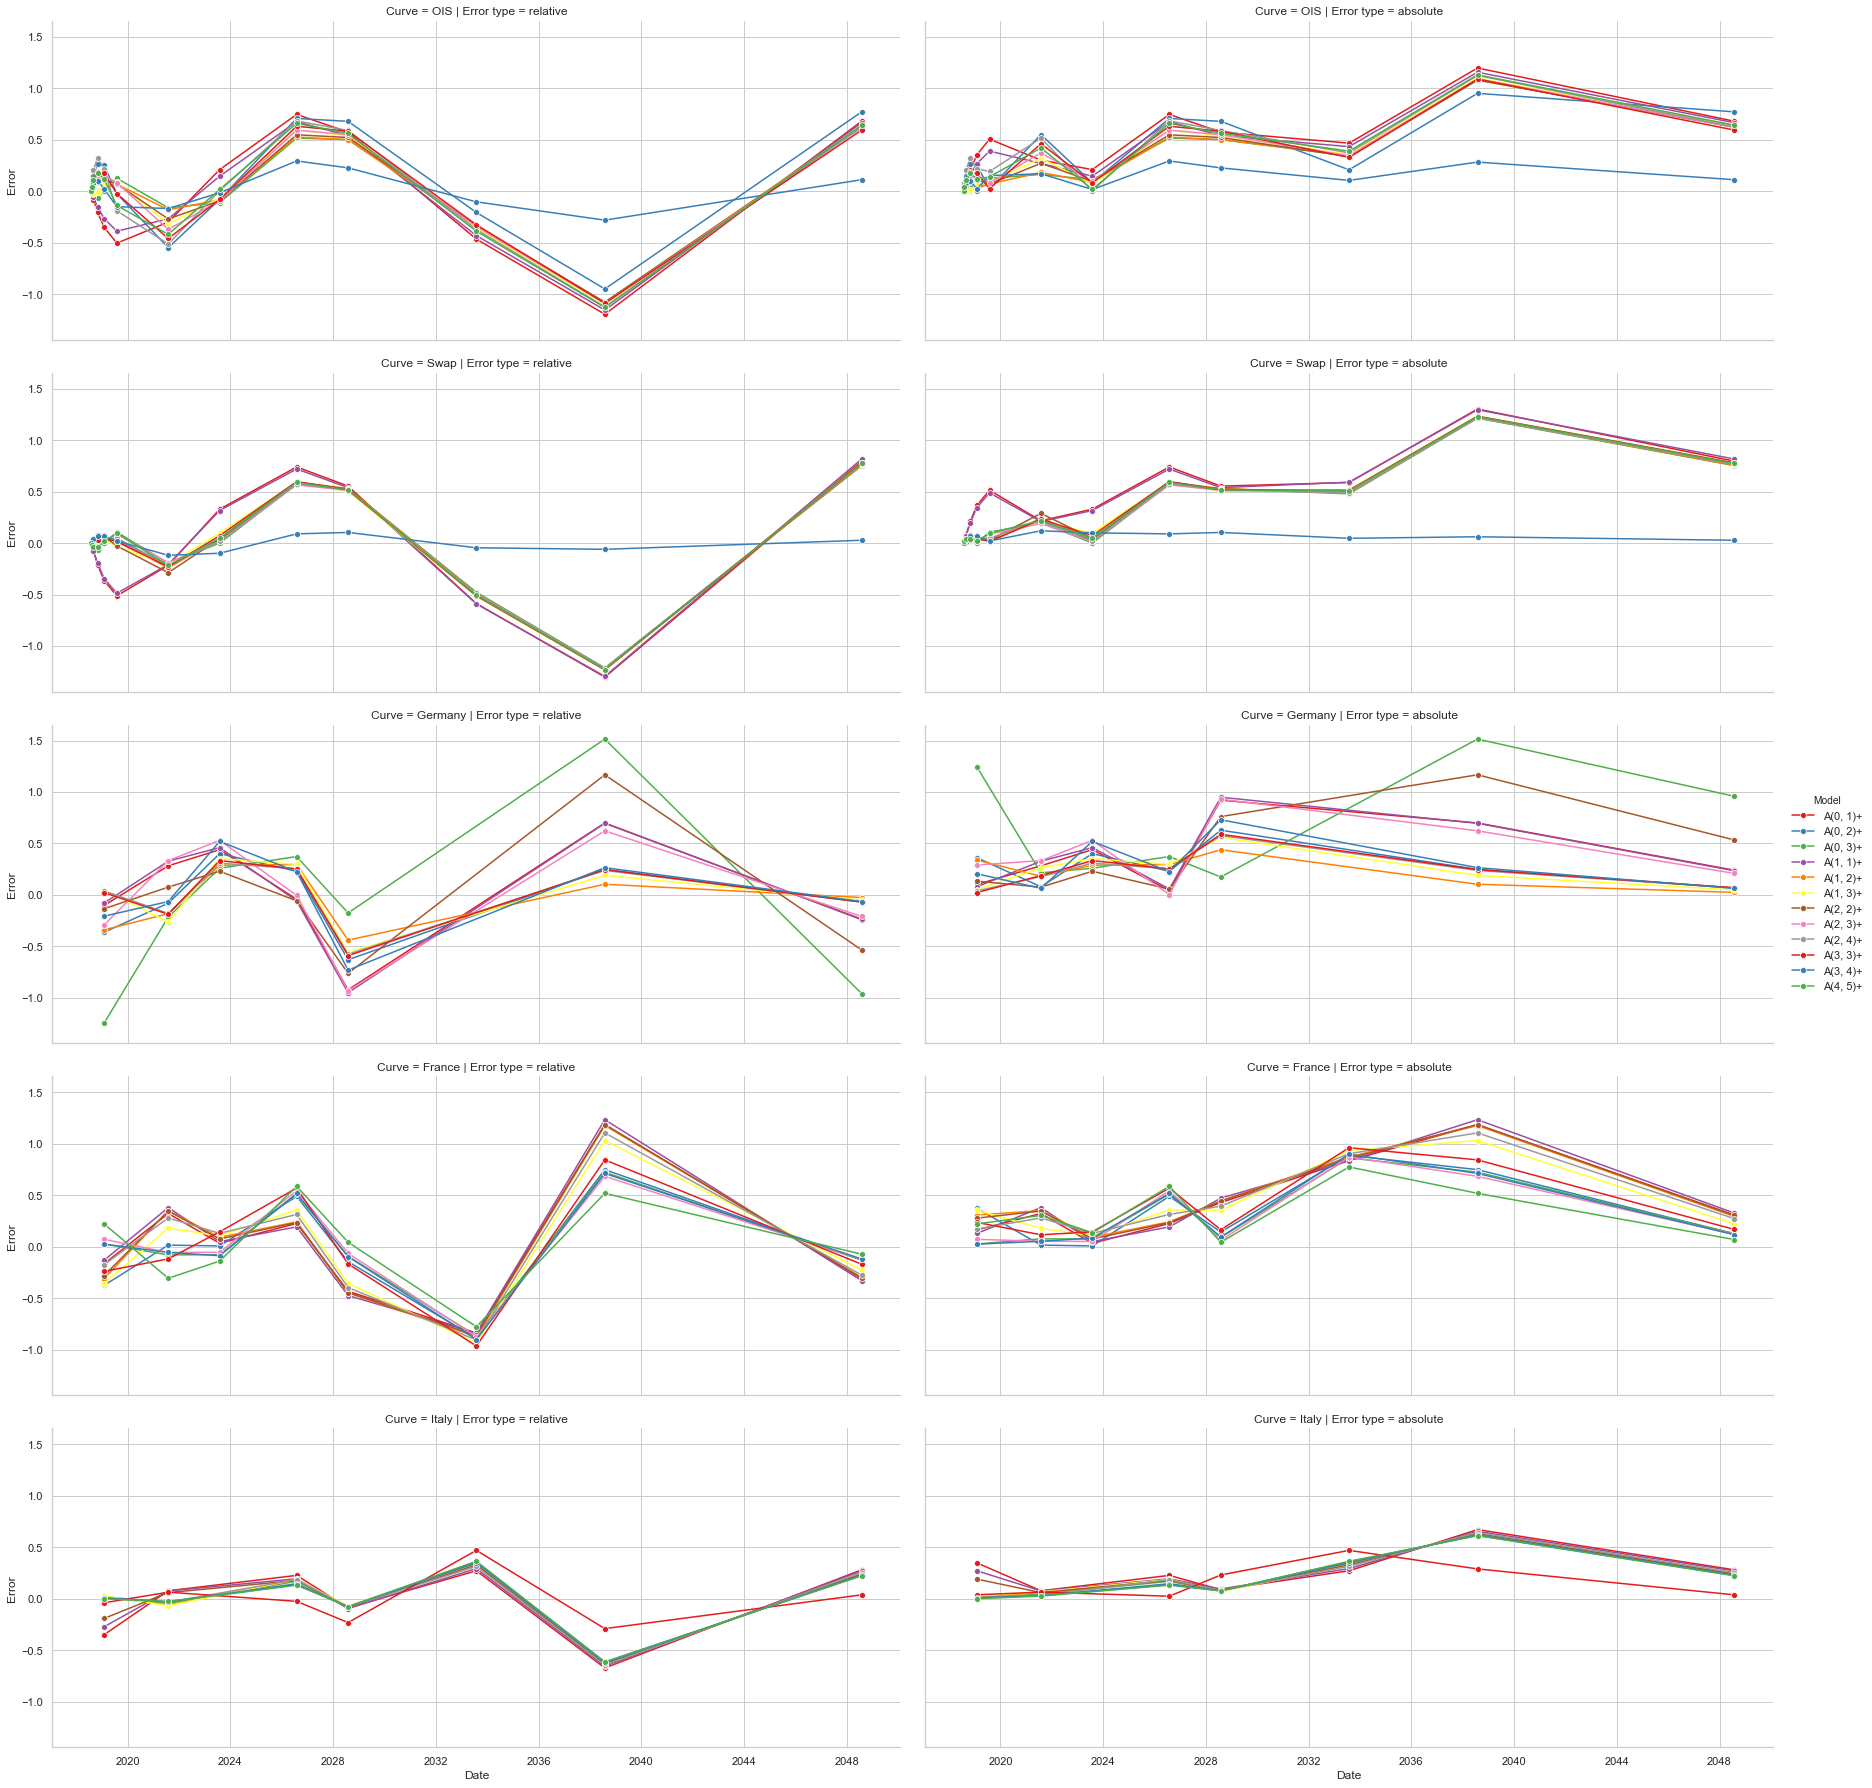

In [6]:
sns.set(style='whitegrid')
g = sns.FacetGrid(df, 
                  col='Error type', 
                  row='Curve', 
                  hue='Model', 
                  height=5, 
                  aspect=2.5, 
                  palette='Set1',
                  row_order=['OIS', 'Swap', 'Germany', 'France', 'Italy'])
g = (g.map(sns.lineplot, 'Date', 'Error', marker='o').add_legend())

In [7]:
def draw_curves():

    methods = []
    method_names = ['Linear', 'QuadraticCurve', 'CubicSpline']
    for method in method_names:

        curves = []
        for curve in [ios, swap, germany, france, italy]:
            curve_data = curve.curve(curve=method).interpolate().reset_index()
            curve_data.columns = ['Date'] + list(curve_data.columns)[1:]
            curves.append(curve_data)

        curves = pd.concat(curves, keys=['OIS', 'Swap', 'Germany', 'France', 'Italy']).reset_index()
        curves.columns = ['Curve', 'Drop'] + list(curves.columns)[2:]
        curves = curves.drop(columns='Drop')

        methods.append(curves)

    methods = pd.concat(methods, keys=method_names).reset_index()
    methods.columns = ['Method', 'Drop'] + list(methods.columns)[2:]
    methods = methods.drop(columns=['Drop', 'Years'])
    methods['Rates'] = methods['Rates'] * 100
    methods['Forward rate'] = methods['Forward rate'] * 100

    curves_data = pd.melt(methods, value_vars=methods.columns[3:], id_vars=methods.columns[:3], var_name='Attribute', value_name='Rate')
    
    return curves_data

curves_data = draw_curves()

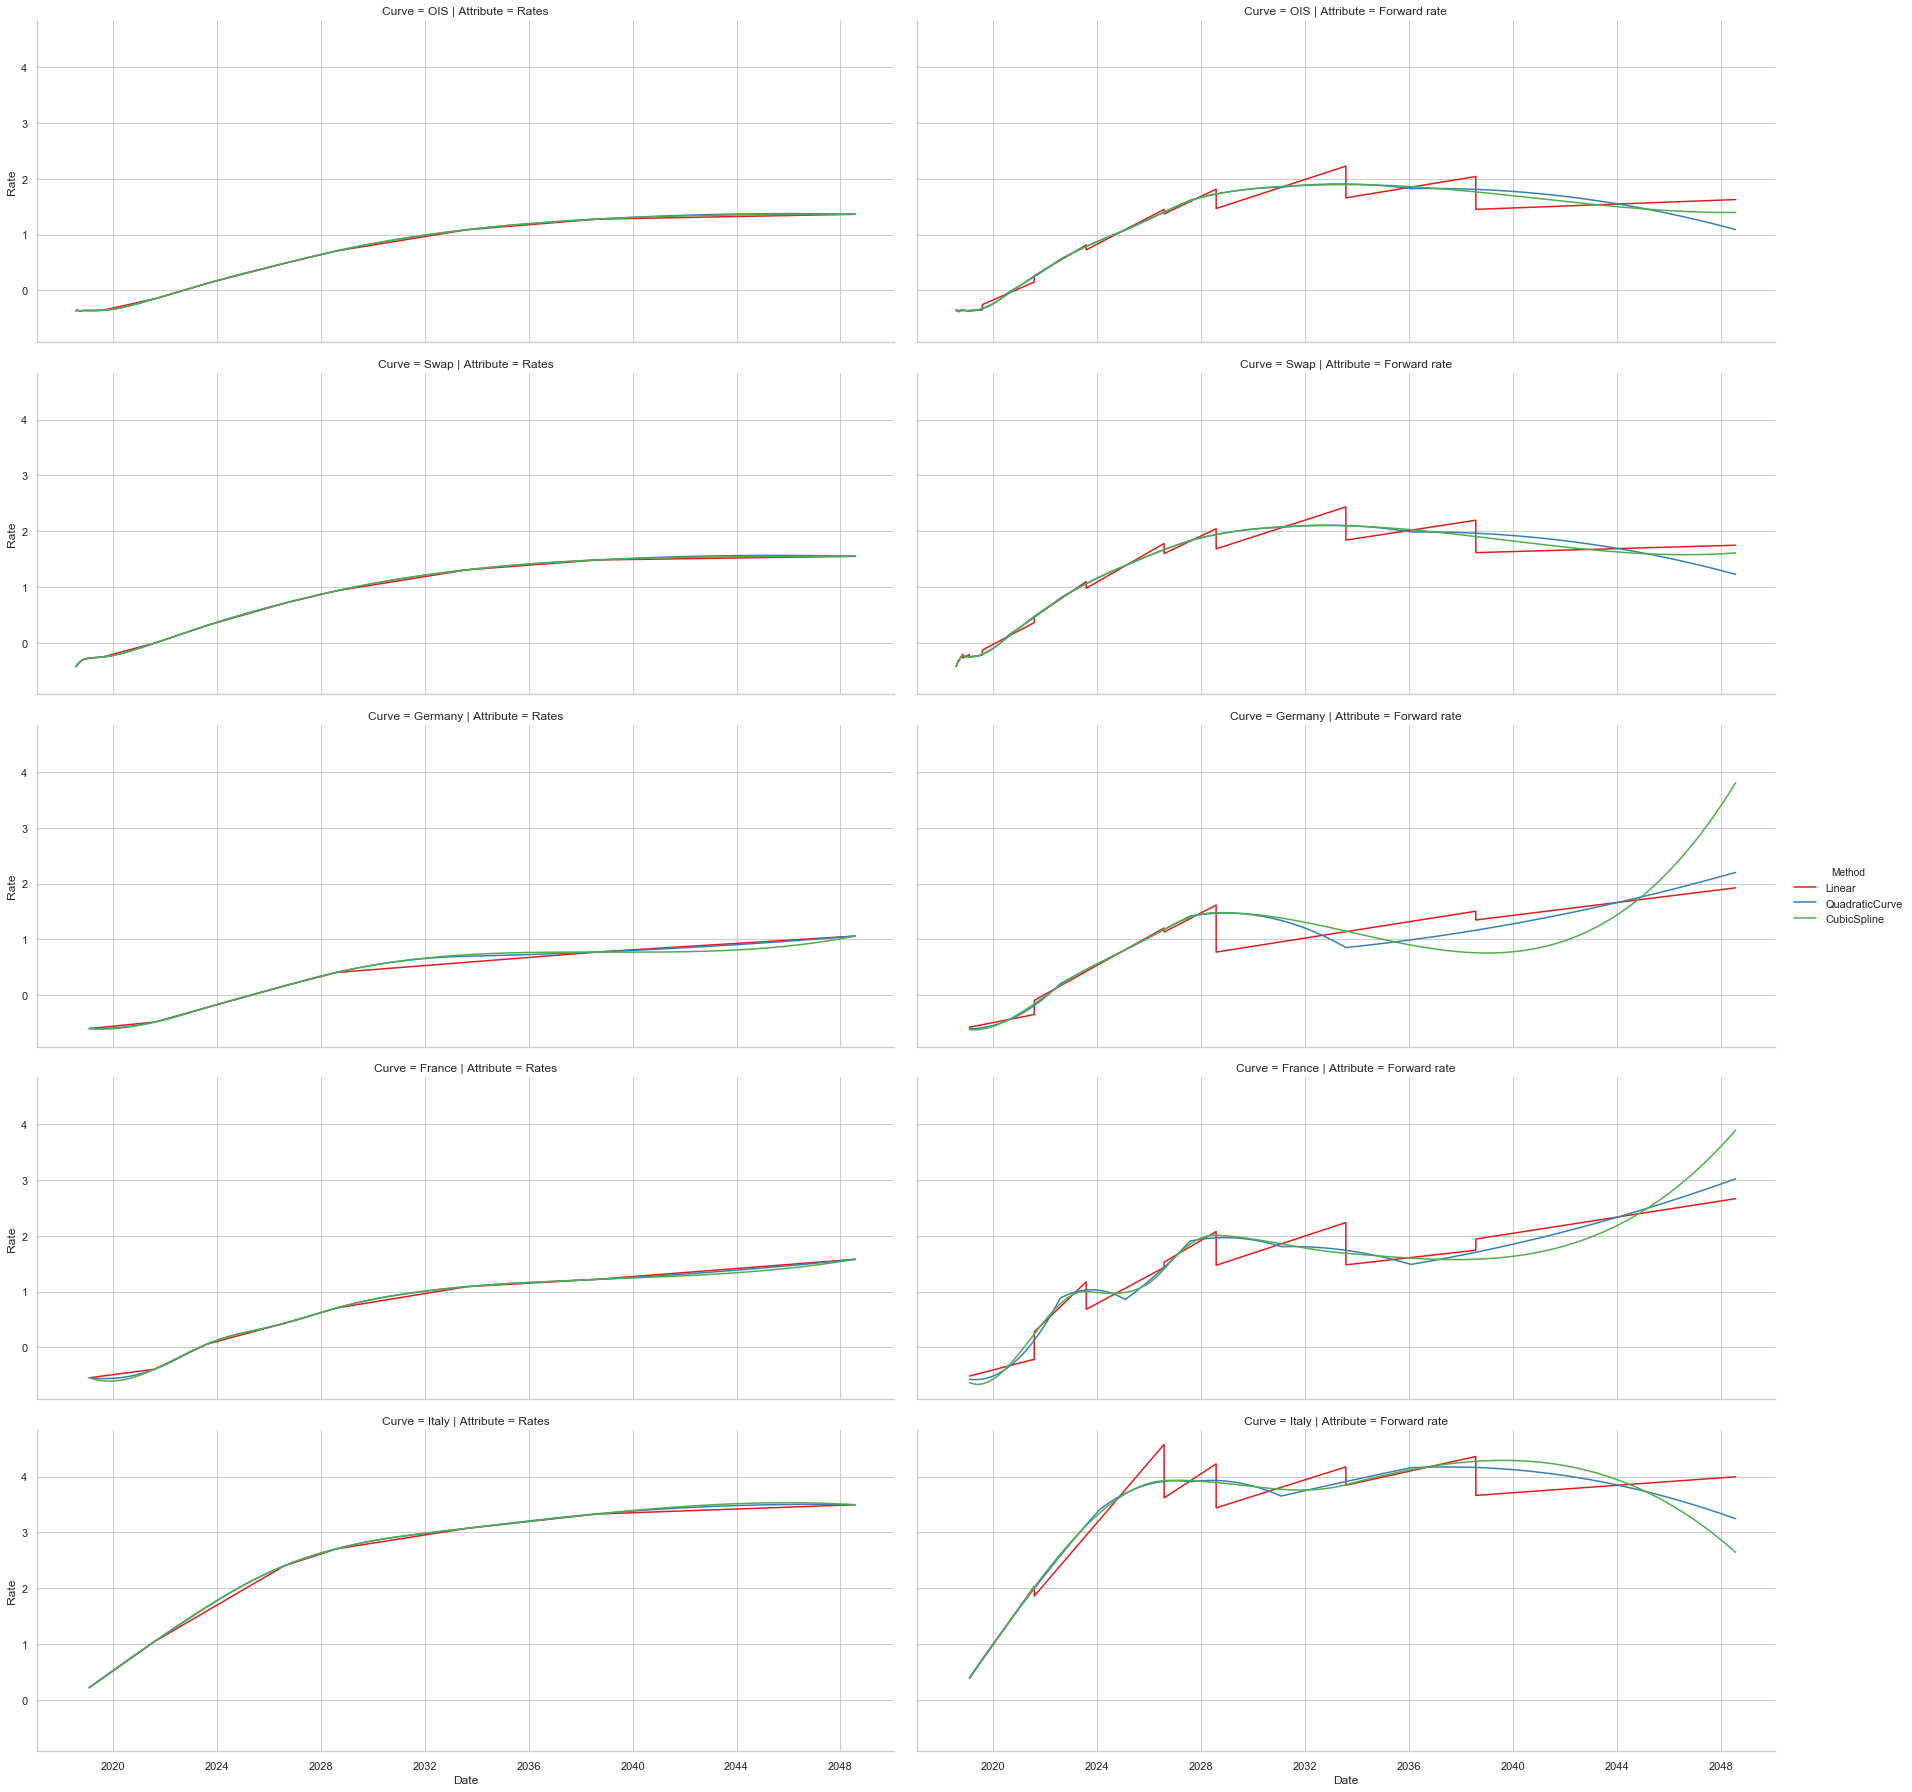

In [29]:
g = sns.FacetGrid(curves_data[curves_data['Attribute'] != 'Zeros'], 
                  col='Attribute', 
                  row='Curve', 
                  hue='Method', 
                  height=5, 
                  aspect=2.5, 
                  palette='Set1',
                  row_order=['OIS', 'Swap', 'Germany', 'France', 'Italy'])
g = (g.map(sns.lineplot, 'Date', 'Rate').add_legend())

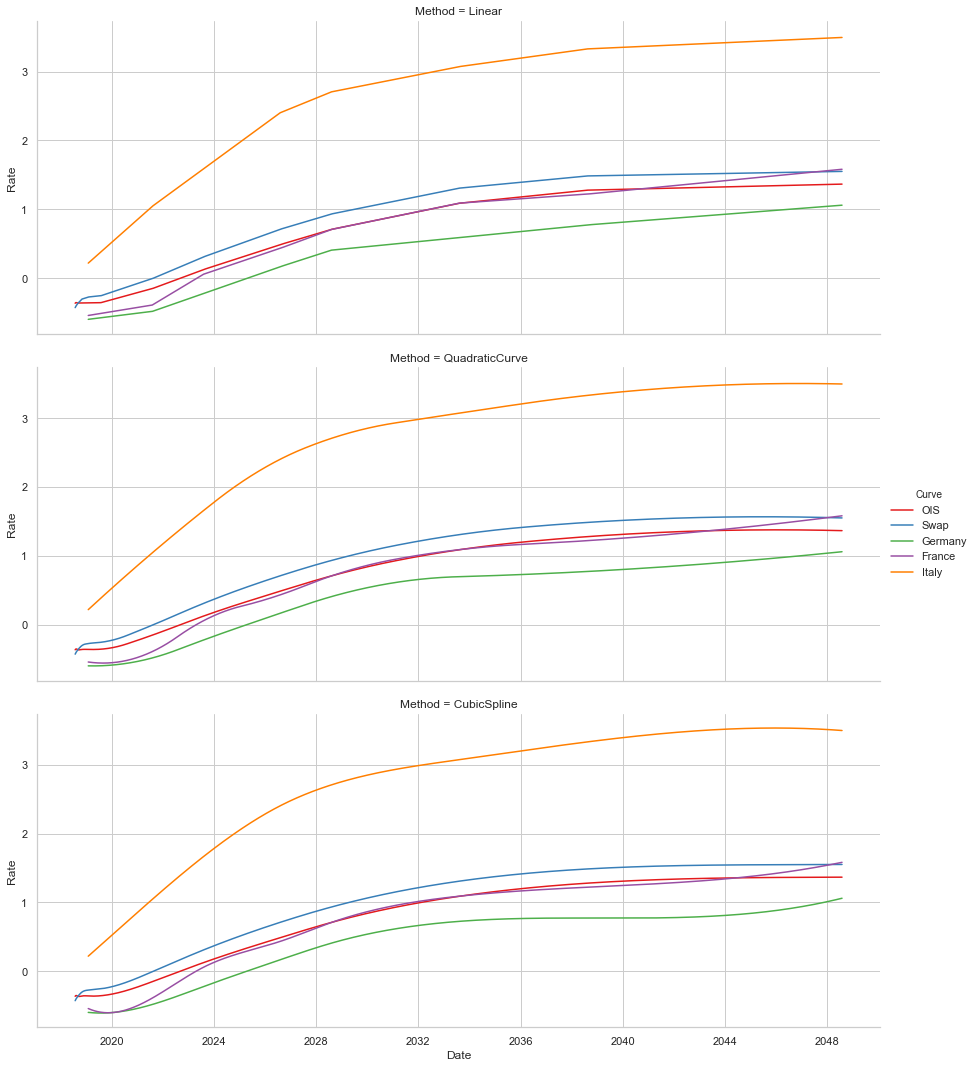

In [156]:
g = sns.FacetGrid(curves_data[curves_data['Attribute'] == 'Rates'], 
                  row='Method', 
                  hue='Curve', 
                  height=5, 
                  aspect=2.5, 
                  palette='Set1')
g = (g.map(sns.lineplot, 'Date', 'Rate').add_legend())

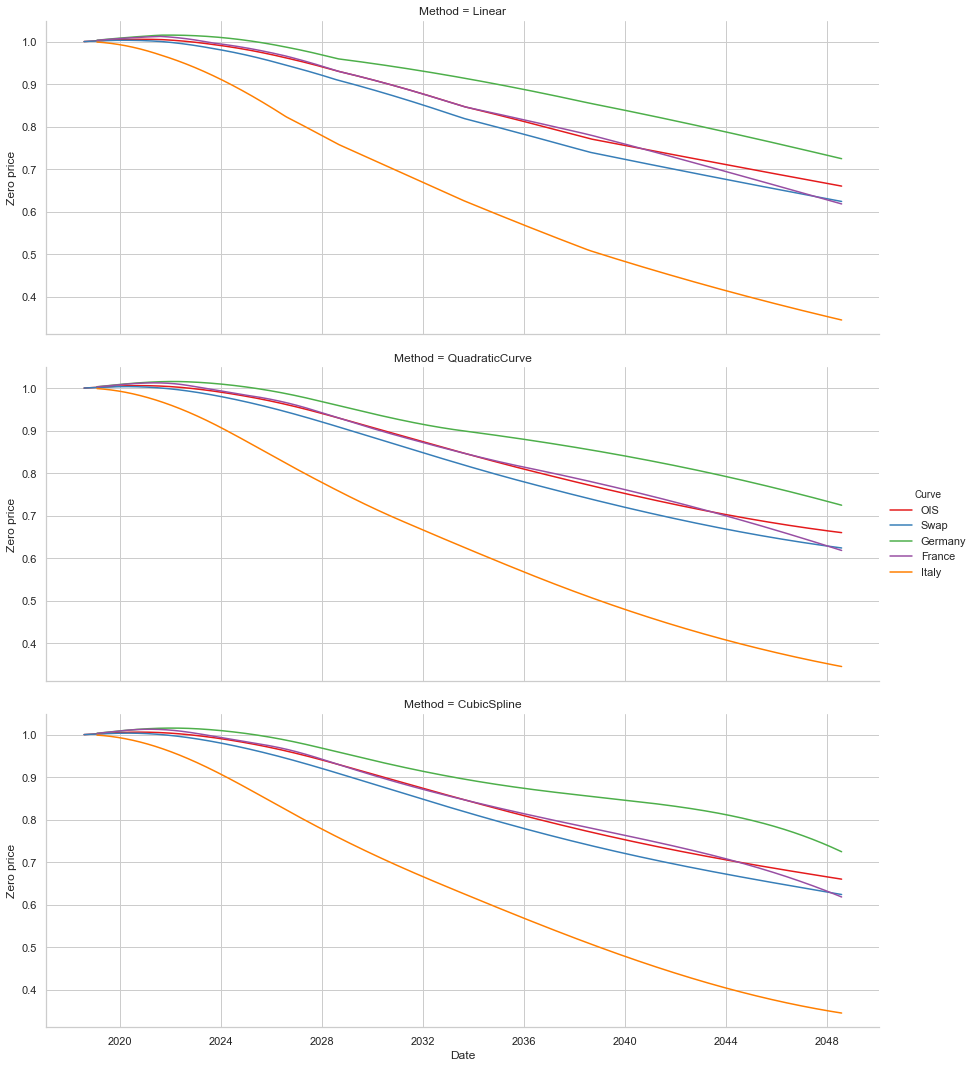

In [161]:
zeros = curves_data[curves_data['Attribute'] == 'Zeros']
zeros.columns = list(zeros.columns)[:-1] + ['Zero price']

g = sns.FacetGrid(zeros, 
                  row='Method', 
                  hue='Curve', 
                  height=5, 
                  aspect=2.5, 
                  palette='Set1')
g = (g.map(sns.lineplot, 'Date', 'Zero price').add_legend())

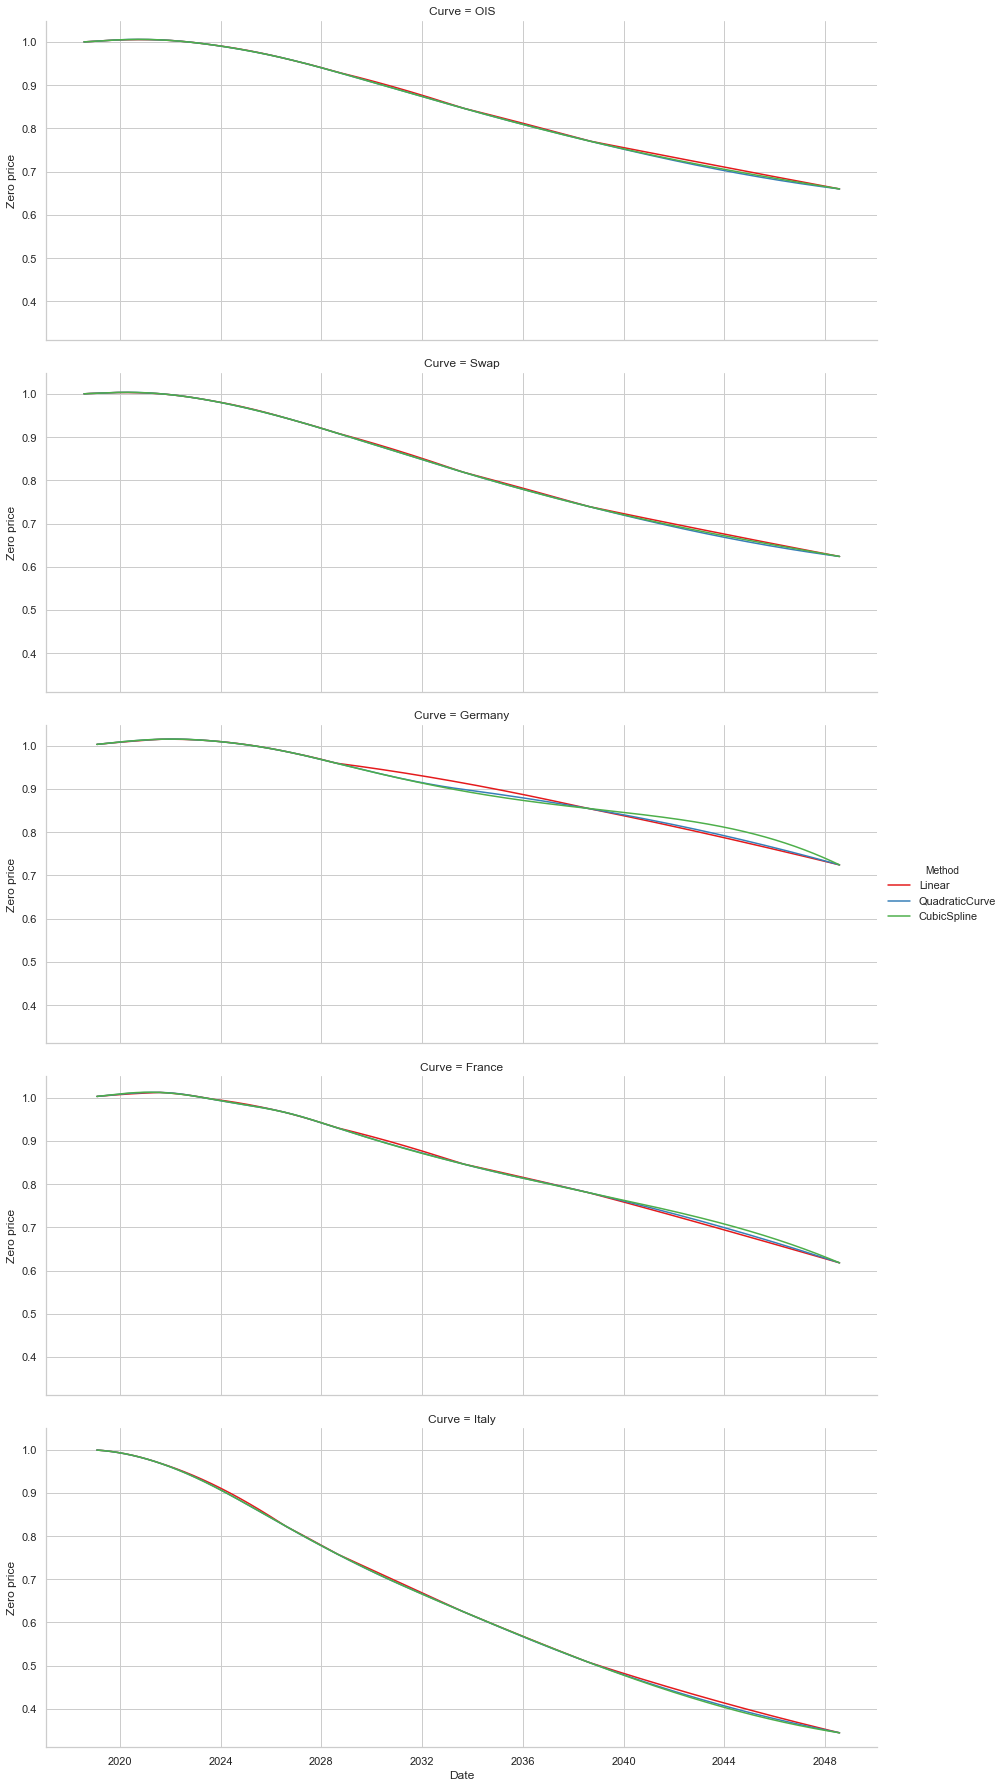

In [162]:
zeros = curves_data[curves_data['Attribute'] == 'Zeros']
zeros.columns = list(zeros.columns)[:-1] + ['Zero price']

g = sns.FacetGrid(zeros, 
                  row='Curve', 
                  hue='Method', 
                  height=5, 
                  aspect=2.5, 
                  palette='Set1')
g = (g.map(sns.lineplot, 'Date', 'Zero price').add_legend())

In [8]:
today = ios.today

def get_curve_from_zeros(series, curve, today=today):
    curve_object = curve(today=today)
    zeros = copy.copy(series)
    zeros.name = 'Zeros'
    zeros = zeros.astype(float)
    curve_object.give_zeros(zeros)
    
    interpolated = curve_object.interpolate()
    
    return curve_object.interpolate()['Rates']

curve_comparasion = {}

for item in results.keys():
    item_name = renaming(item)
    
    curve_comparasion[item_name] = {}
    
    for model in results[item].keys():
        model_name = f'A({str(model[0])}, {str(model[1])})+'
        curve_comparasion[item_name][model_name] = {}
        market = results[item][model]['riskfree']['Market price']
        calibrated = results[item][model]['riskfree']['Calibrated price']
              
        curve_comparasion[item_name][model_name]['Market'] = pd.concat(dict(Linear=get_curve_from_zeros(market, LinearCurve),
                                                                            Quadratic=get_curve_from_zeros(market, QuadraticCurve),
                                                                            Cubic=get_curve_from_zeros(market, CubicSplineCurve)))
        curve_comparasion[item_name][model_name]['Calibrated'] = pd.concat(dict(Linear=get_curve_from_zeros(calibrated, LinearCurve),
                                                                                Quadratic=get_curve_from_zeros(calibrated, QuadraticCurve),
                                                                                Cubic=get_curve_from_zeros(calibrated, CubicSplineCurve)))
        curve_comparasion[item_name][model_name] = pd.concat(curve_comparasion[item_name][model_name])
        
    curve_comparasion[item_name] = pd.concat(curve_comparasion[item_name])
    
curves = pd.concat(curve_comparasion)

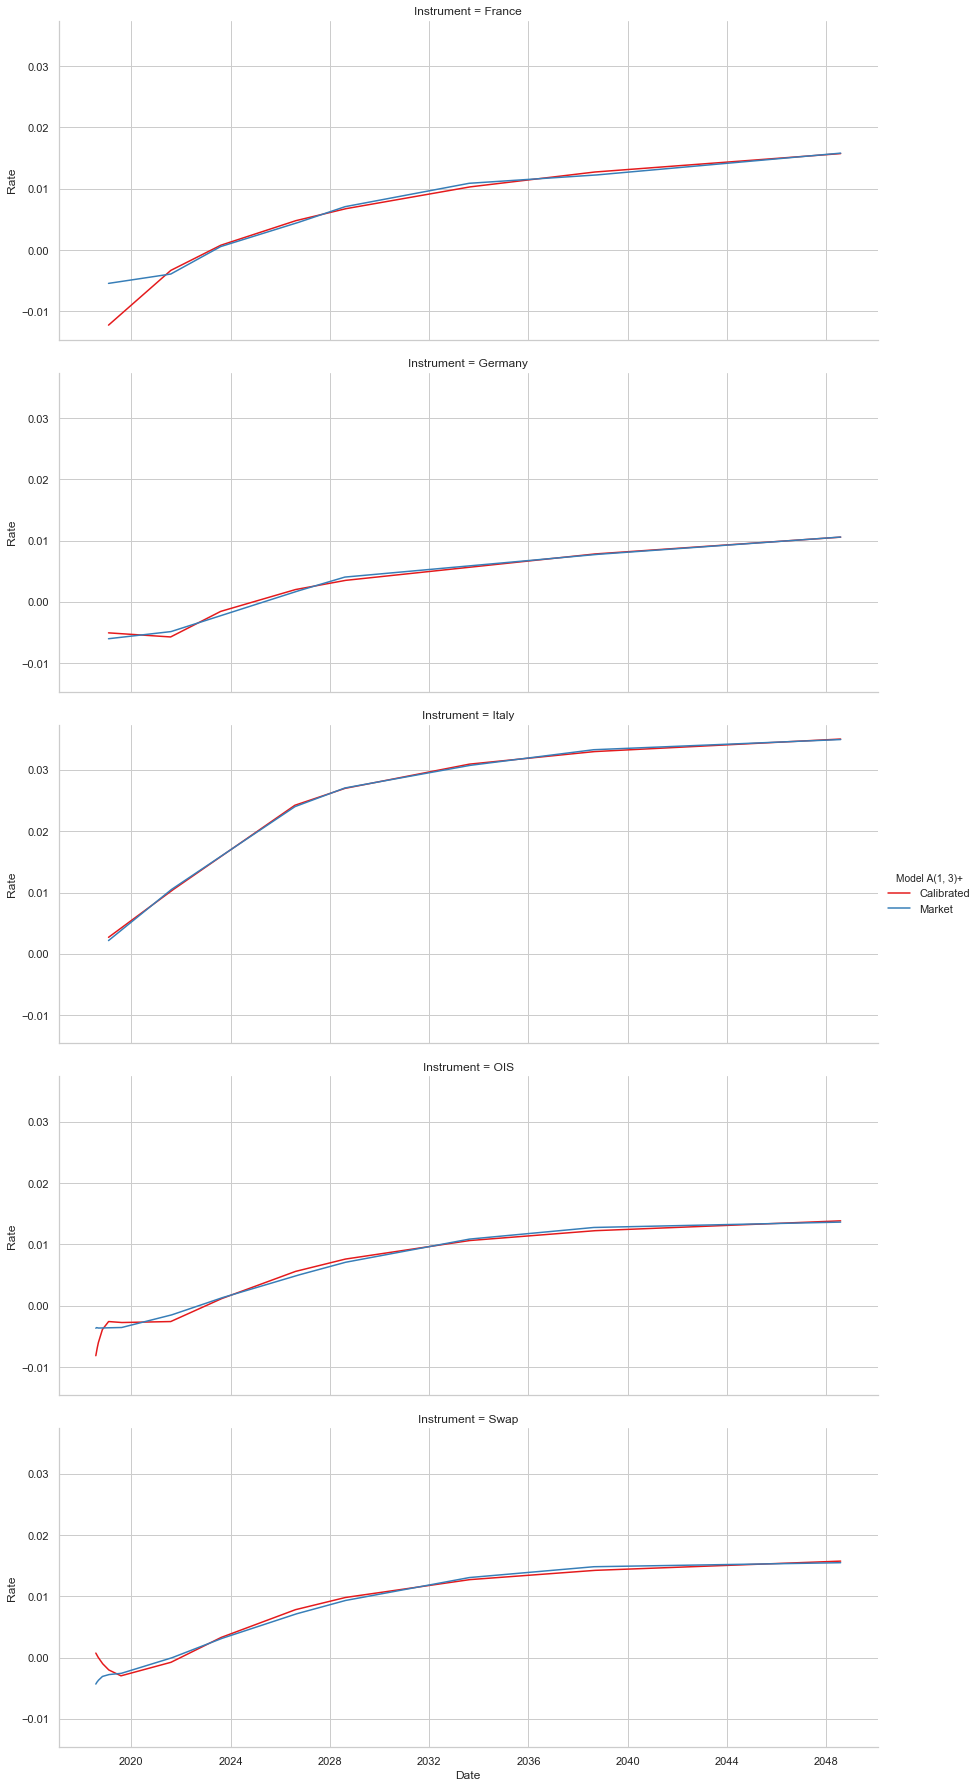

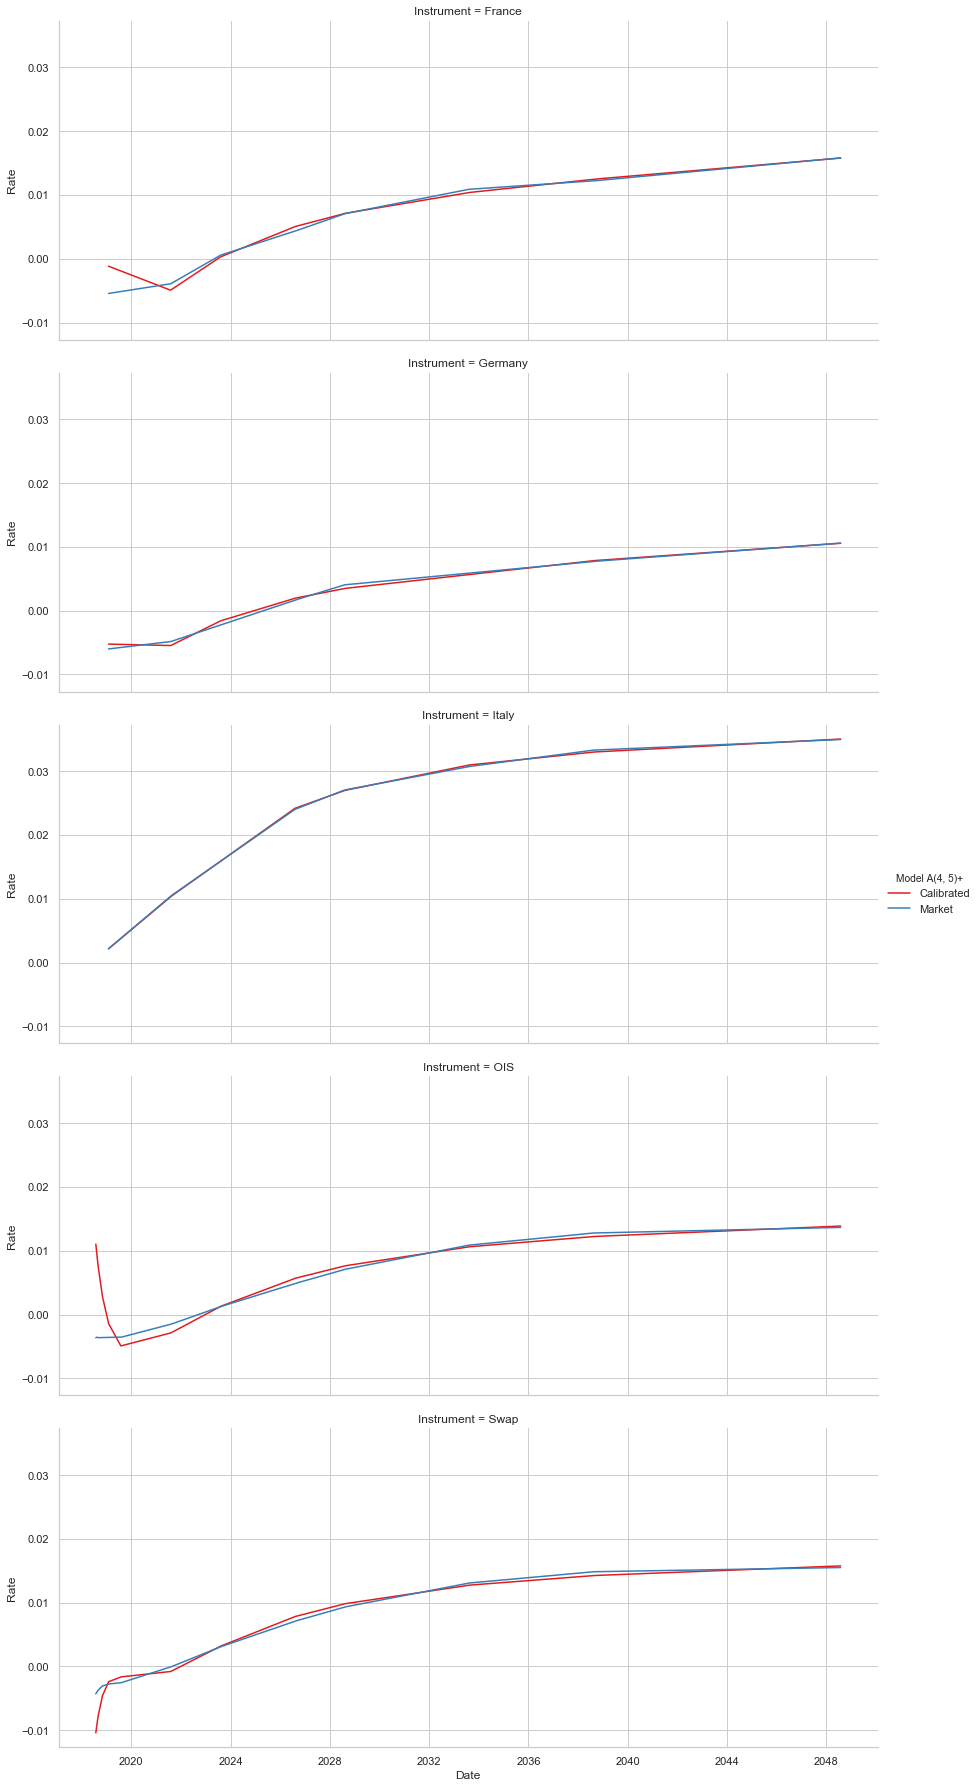

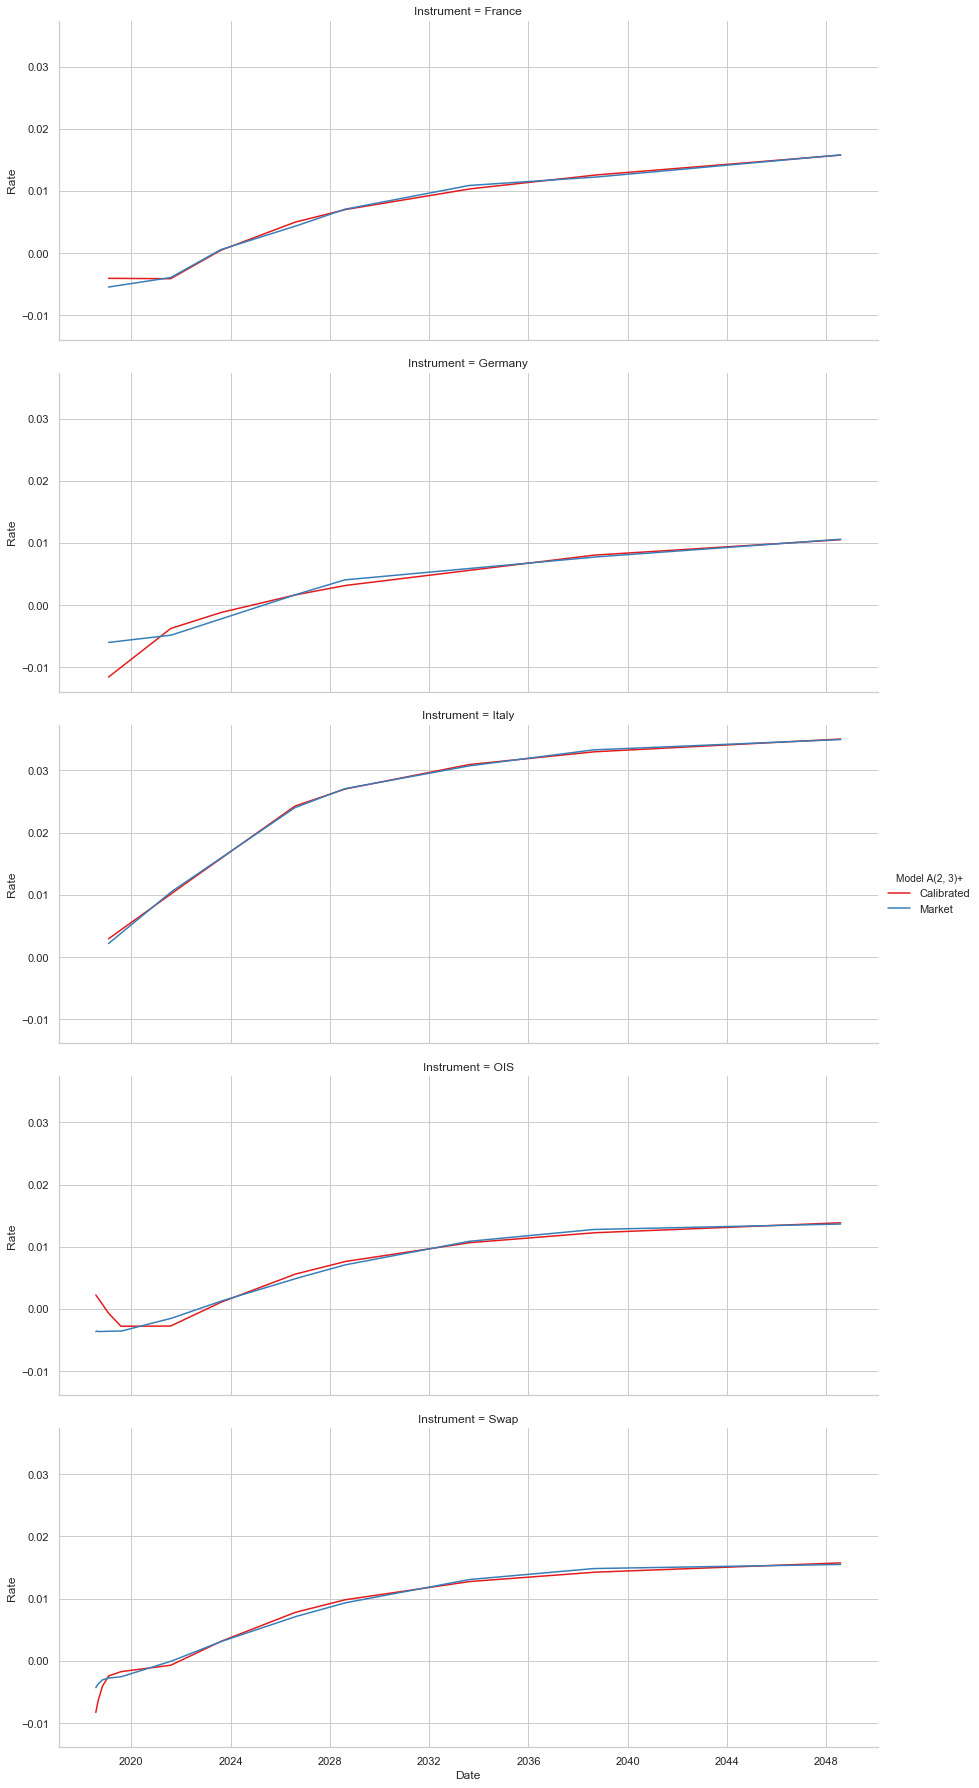

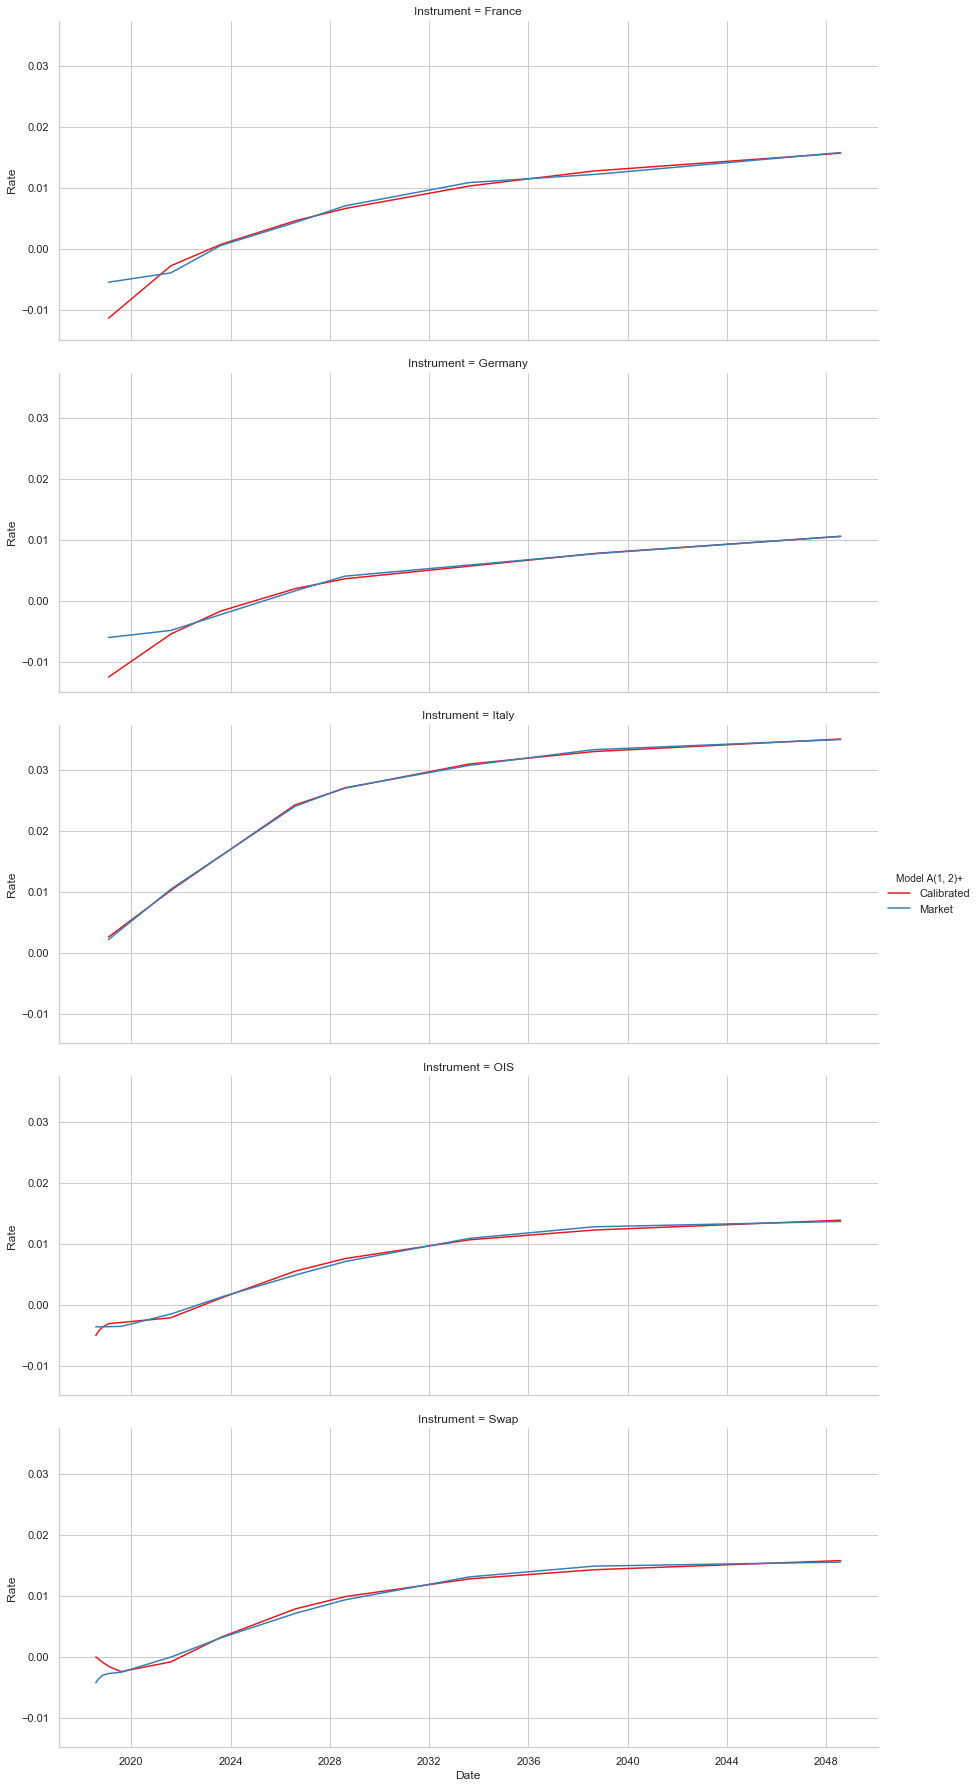

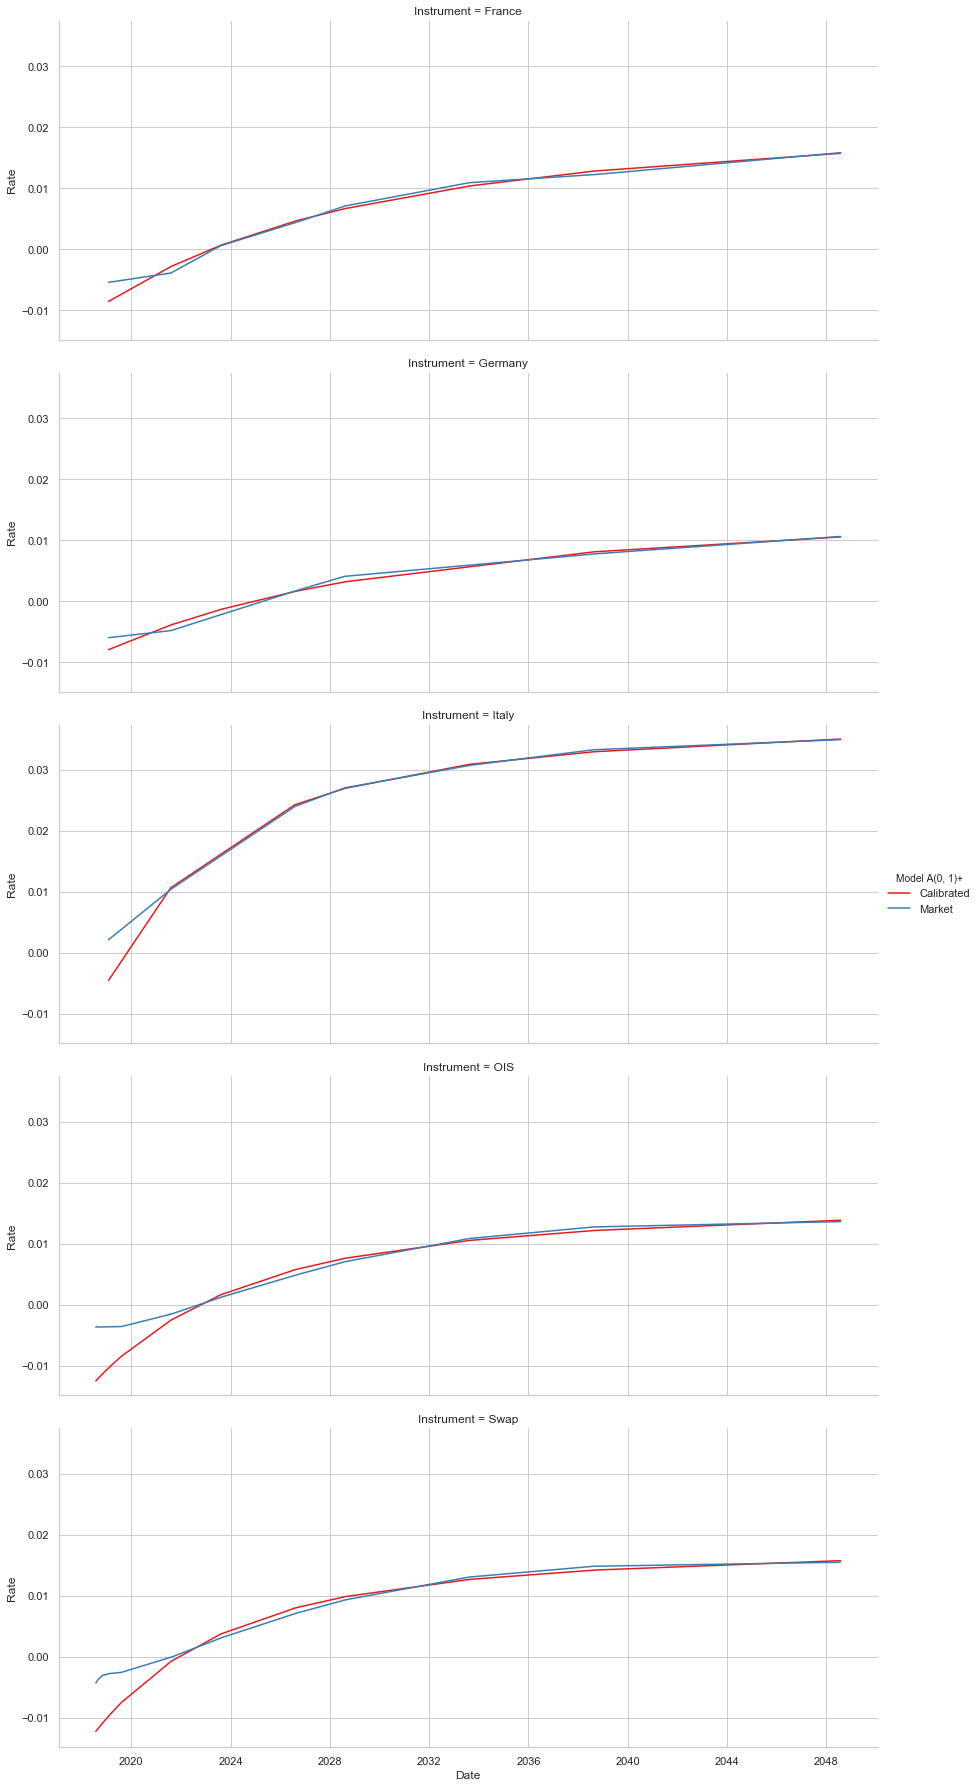

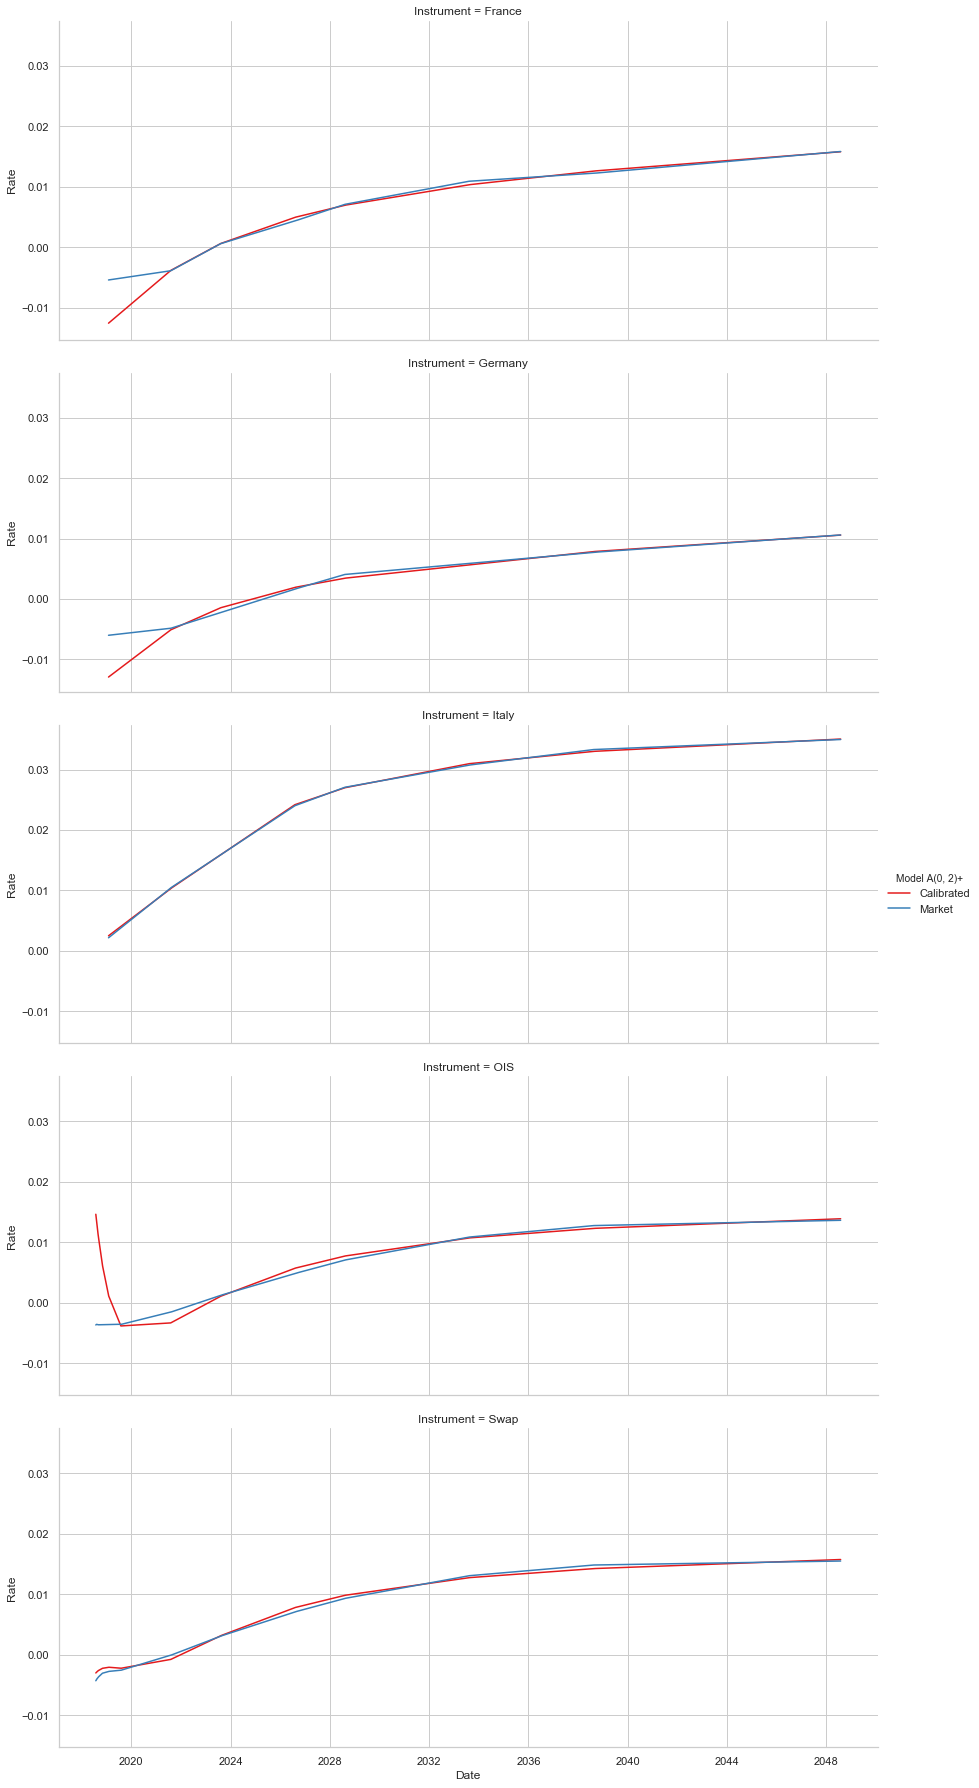

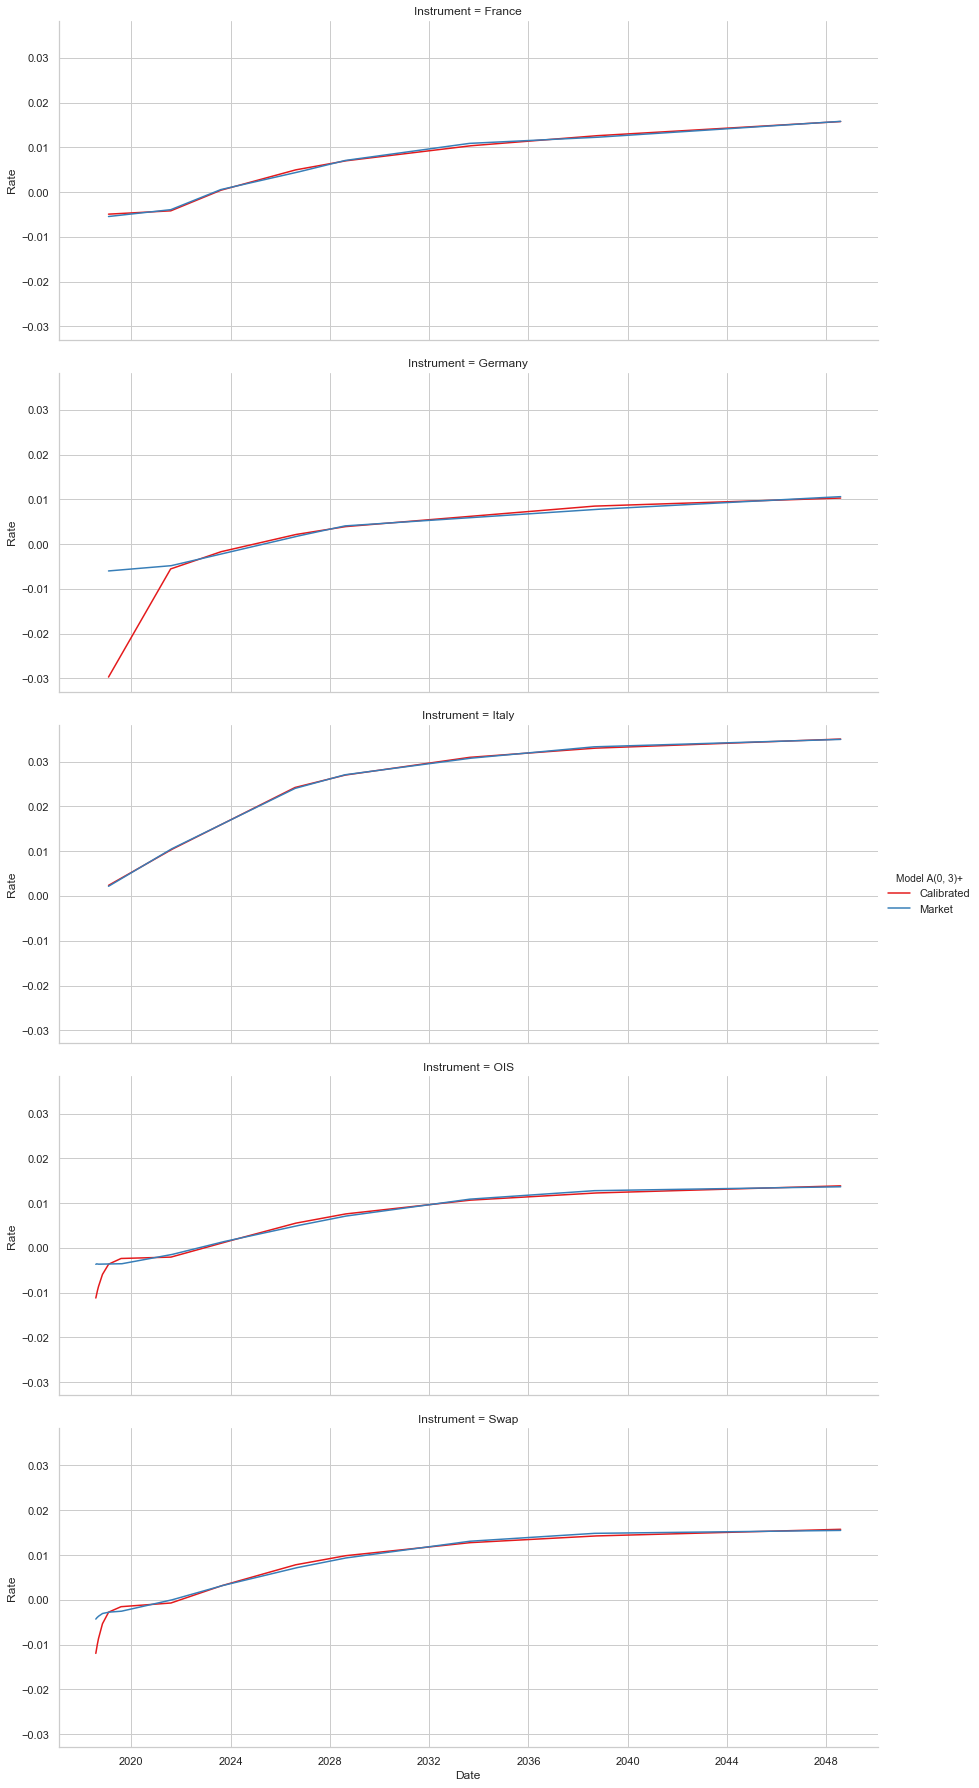

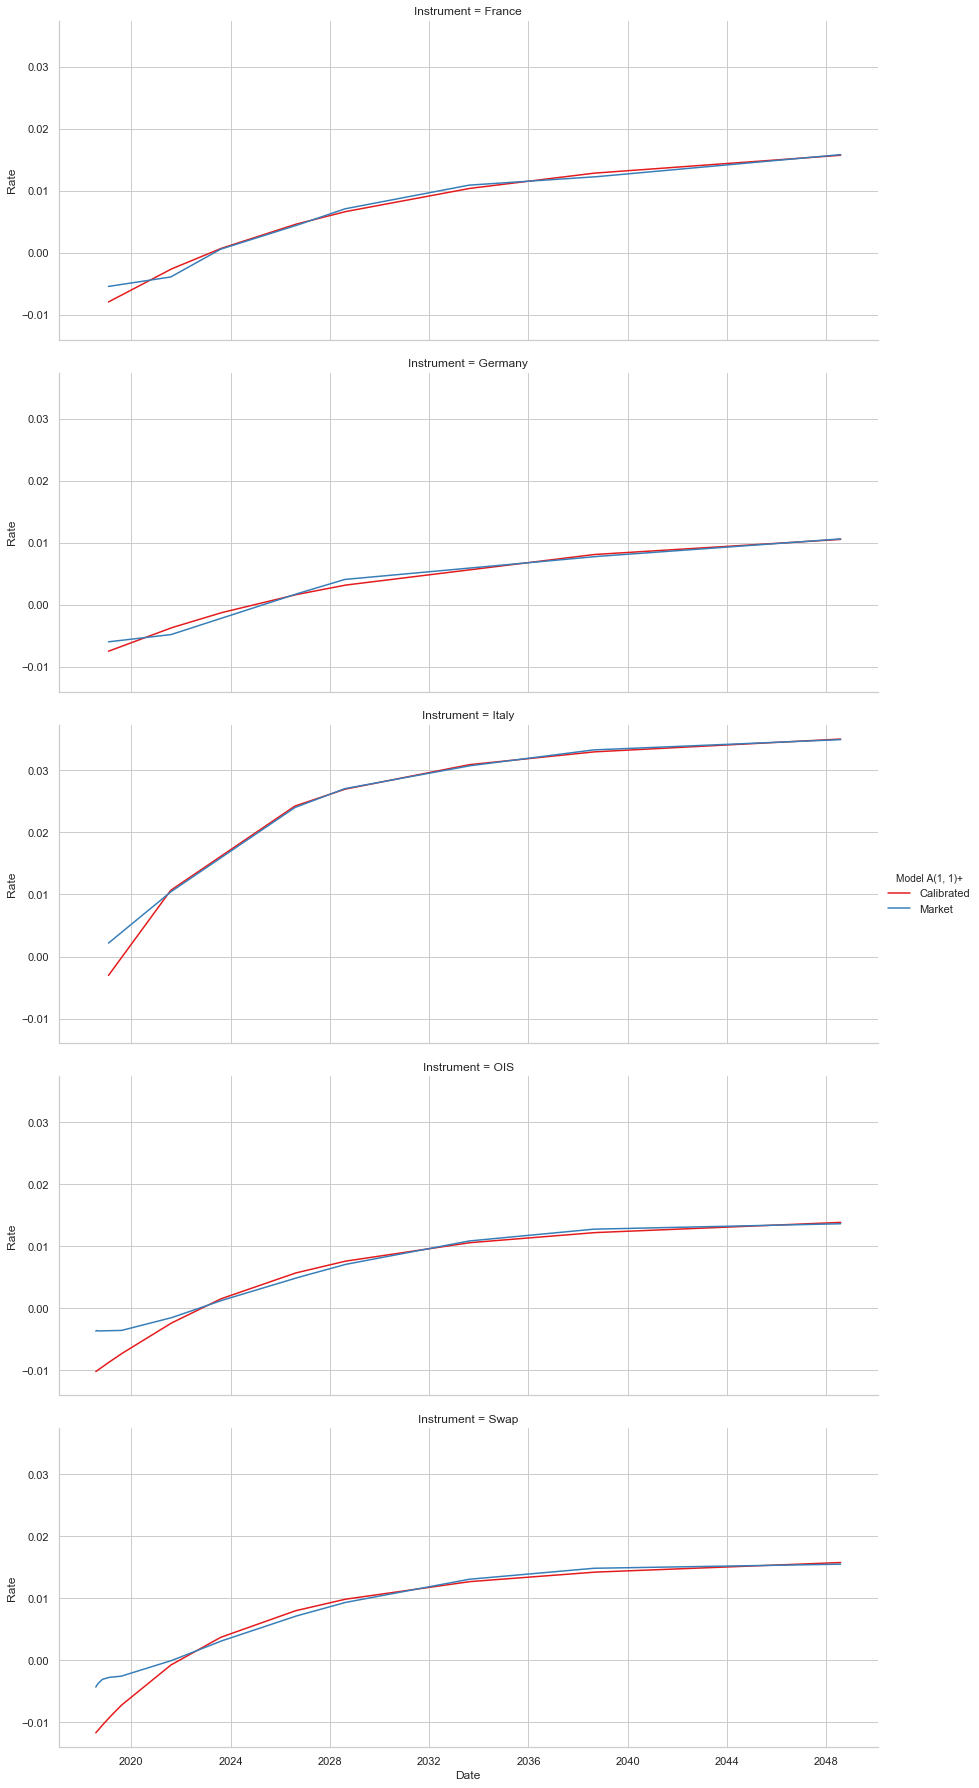

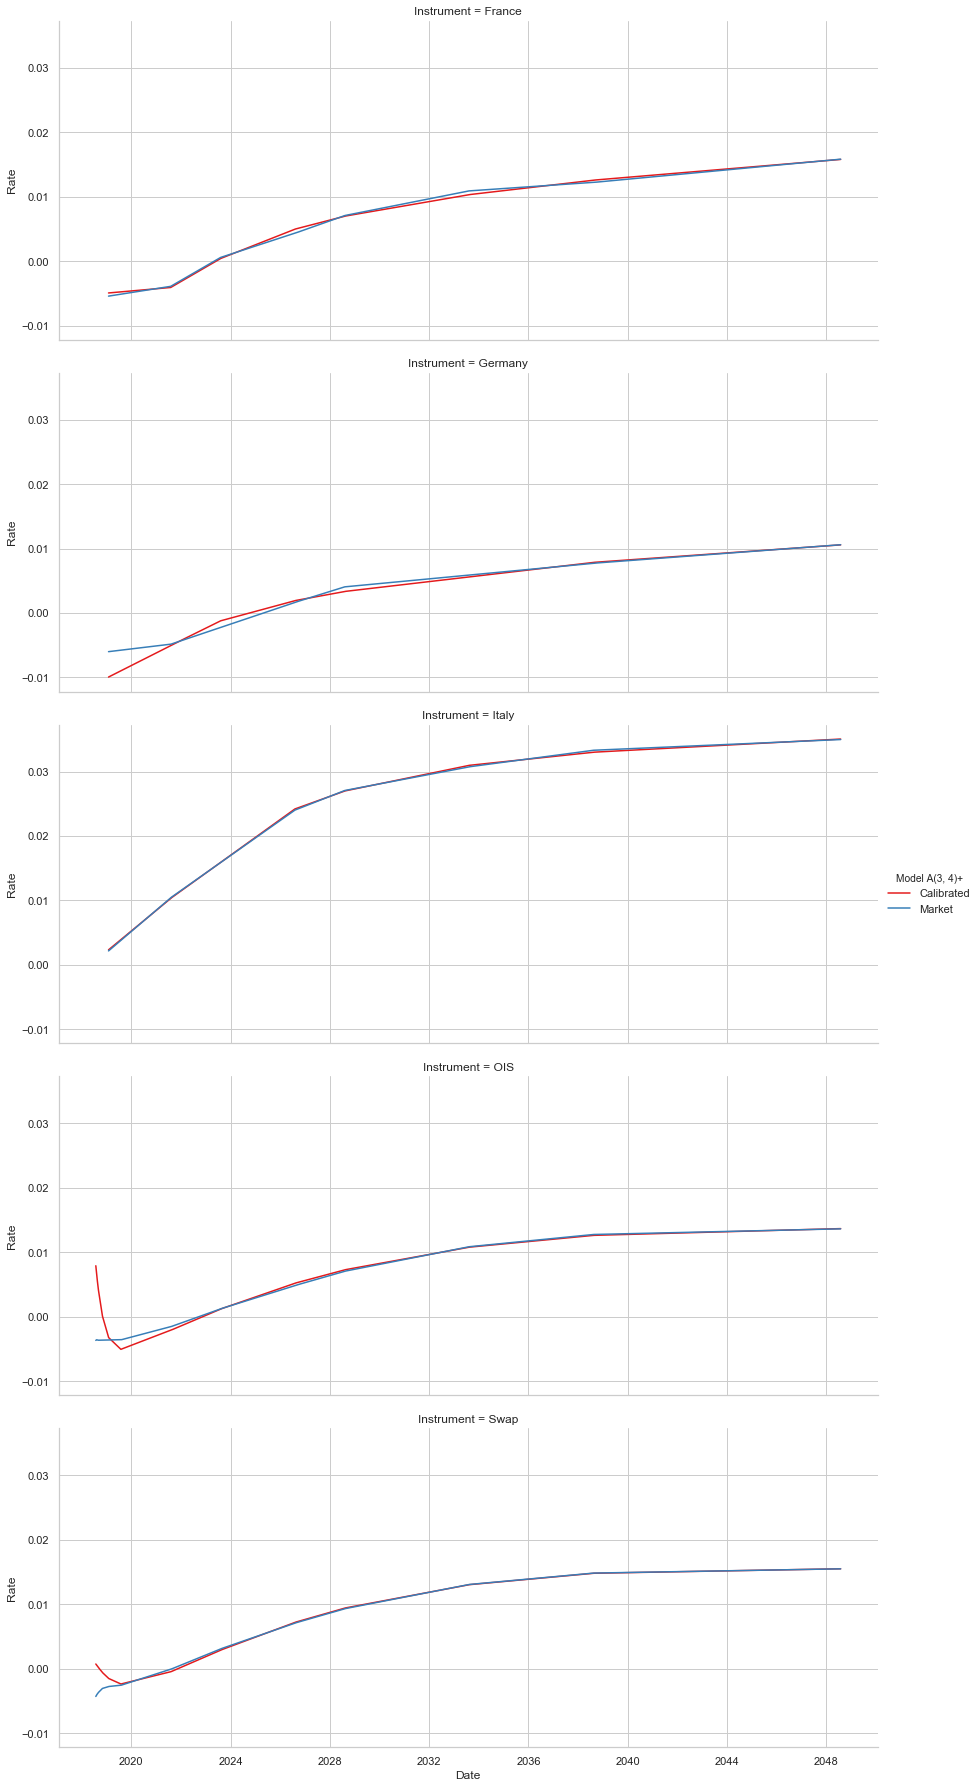

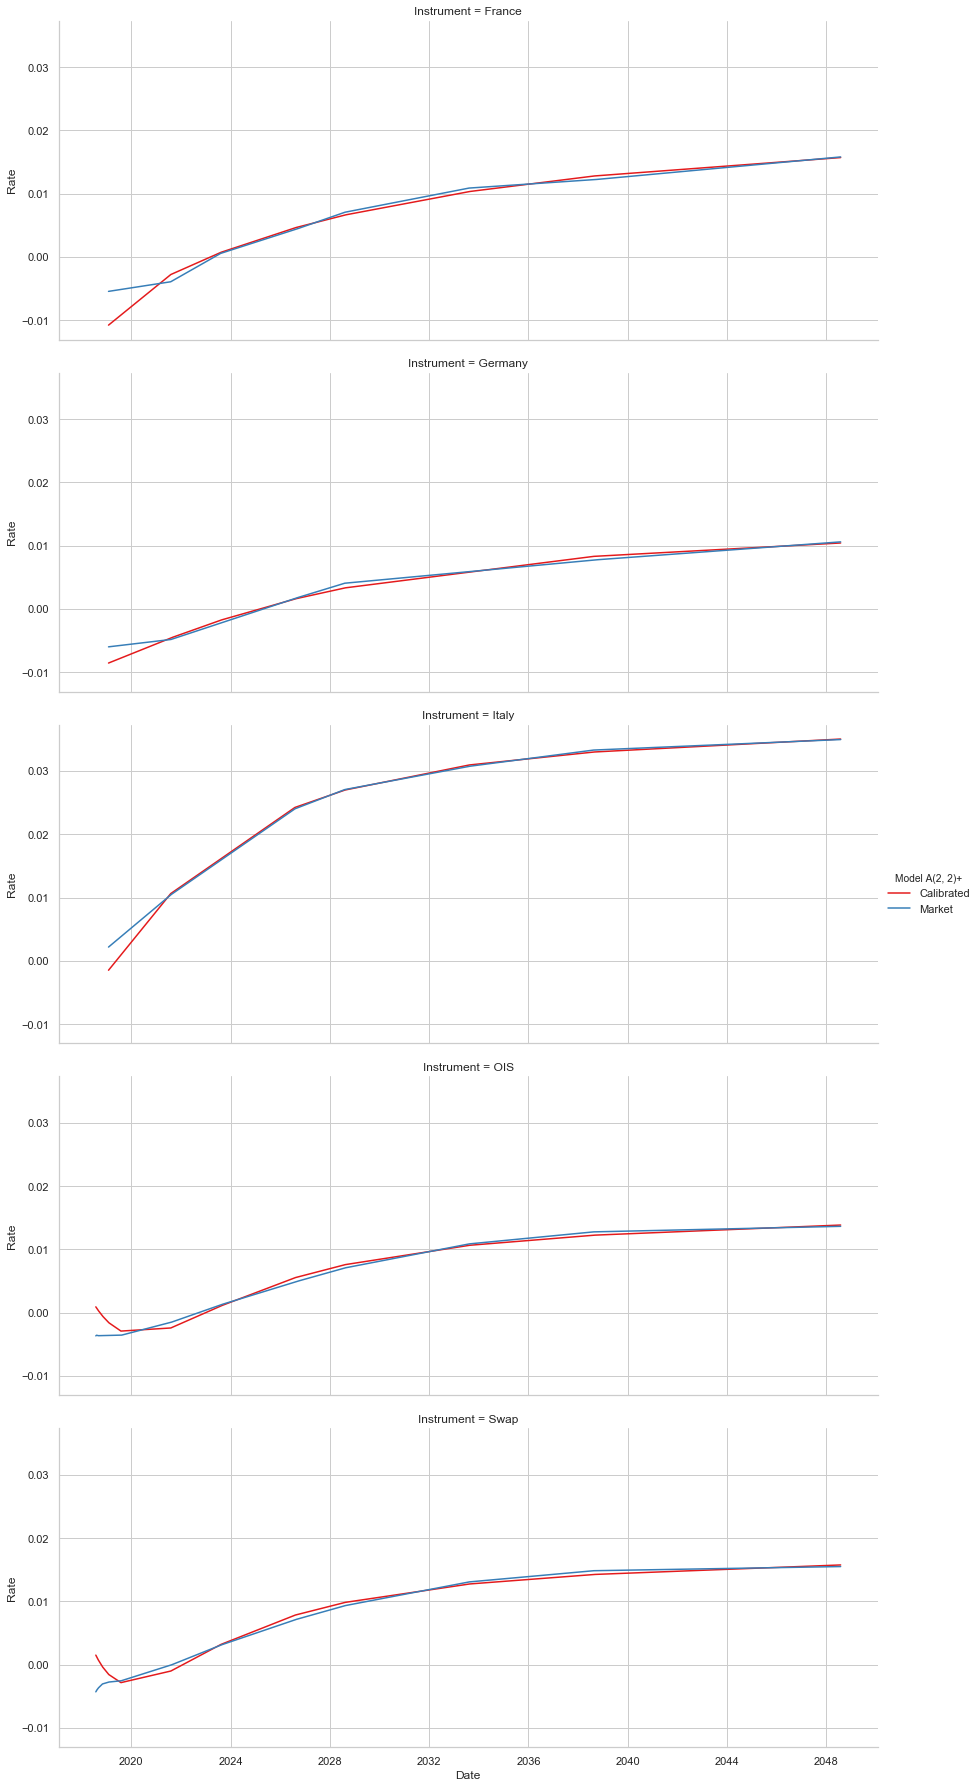

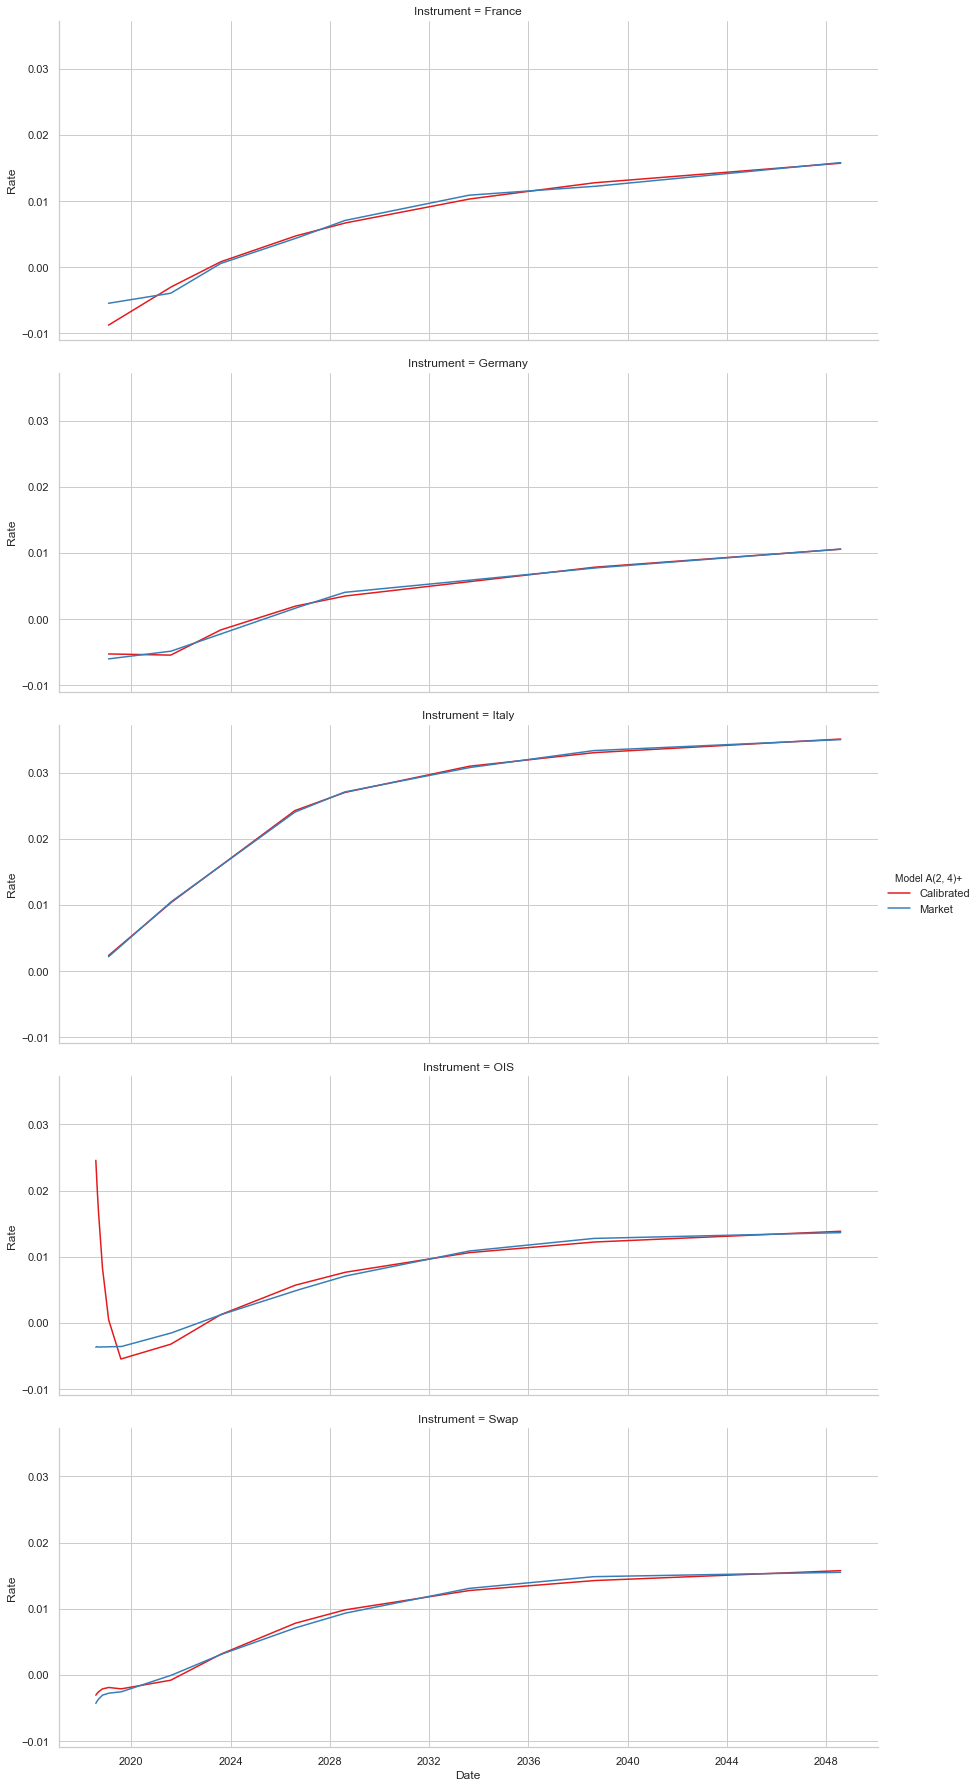

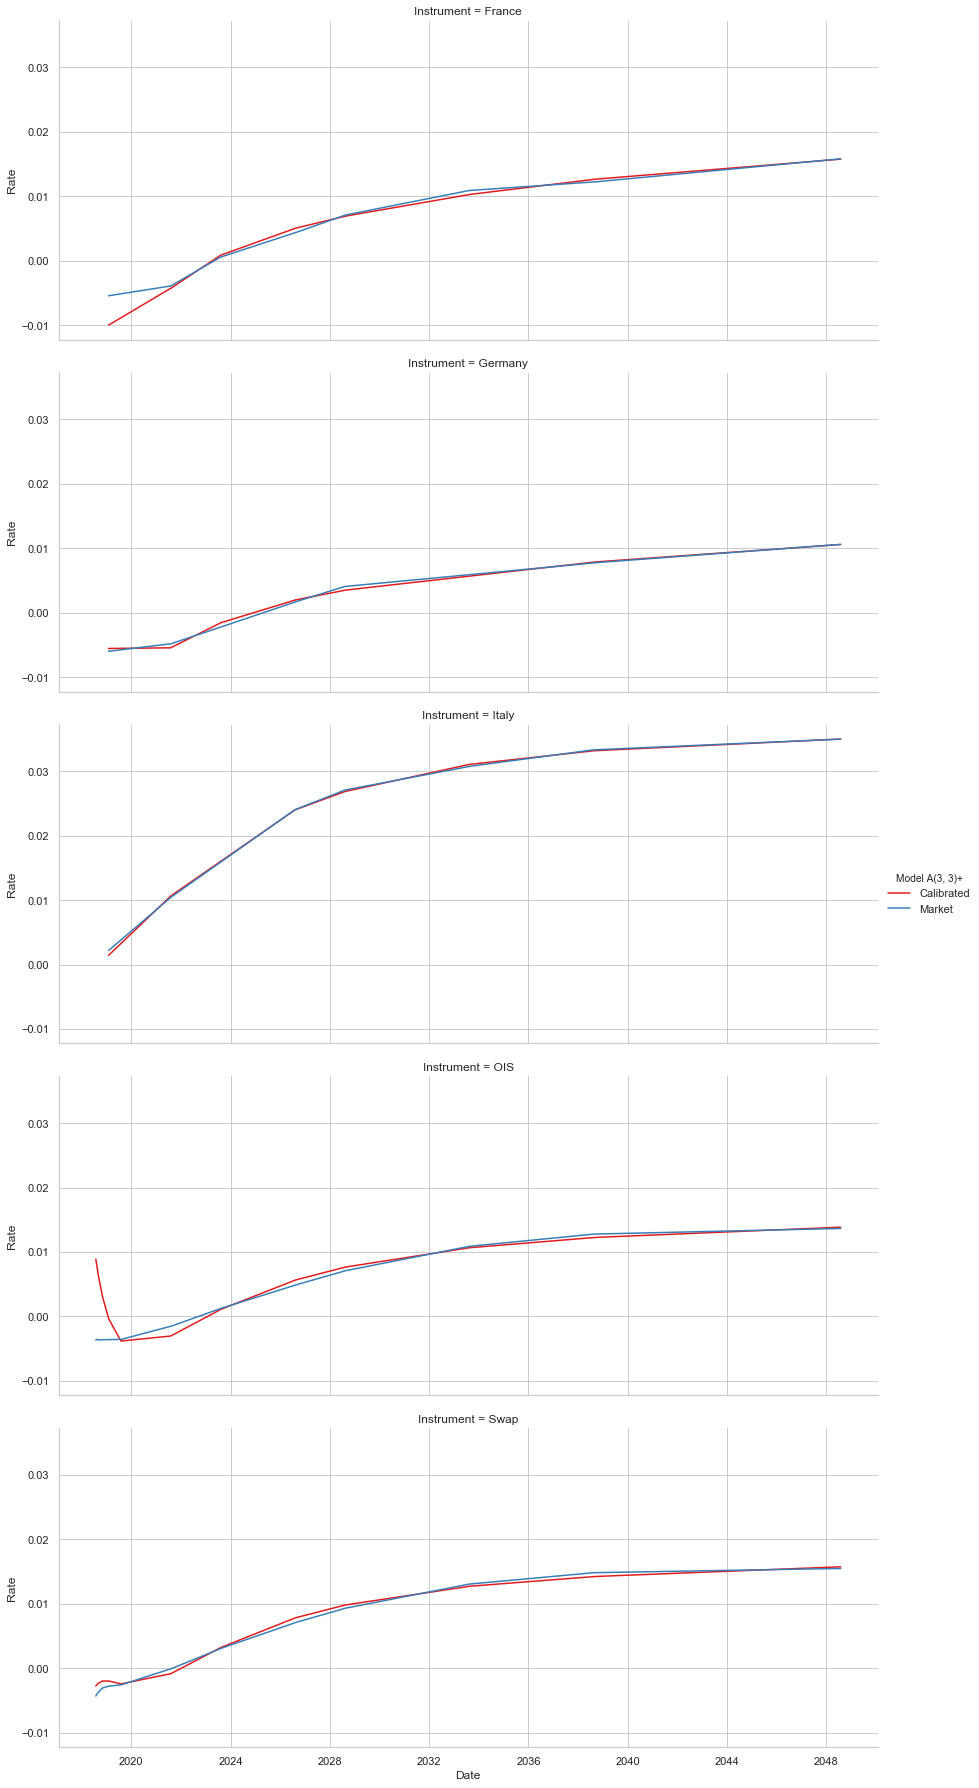

In [9]:
curves2 = curves.reset_index()
curves2.columns = ['Instrument', 'Model', 'Type', 'Method', 'Date', 'Rate']

linear = curves2[curves2['Method'] == 'Linear']


for model in set(linear['Model']):
    g = sns.FacetGrid(linear[linear['Model'] == model], 
                      row='Instrument', 
                      hue='Type', 
                      height=5, 
                      aspect=2.5, 
                      palette='Set1')
    g = (g.map(sns.lineplot, 'Date', 'Rate').add_legend(title=f'Model {model}'))
    plt.show()


In [48]:
def correlation_heatmap(df, title=None, vmin=-1, vmax=1):

    corr = df.astype(float).corr()
    corr = corr.round(2)
    mask = np.zeros_like(corr)
    mask[np.tril_indices_from(mask, -1)] = True
    
    f, ax = plt.subplots(figsize=(9, 6))
    if isinstance(title, str):
        ax.set_title(title)
        
    sns.heatmap(corr, annot=True, mask=mask, square=True, linewidths=.5, ax=ax, vmin=vmin, vmax=vmax)

#correlation_heatmap(relative)

In [84]:
gen_seed, opt_seed = 89453934320, 42

# Models to be run
models = [(2,2), (3, 3), (3, 4)]

if os.path.isfile(location_of_pickled_data + 'alt_data.pickle'):
    with open(location_of_pickled_data + 'alt_data.pickle', 'rb') as f:
        alt_results = pickle.load(f)
else:
    alt_results = {}

if False:

    key, data = 'ios', ios
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)

    key, data = 'swap', swap
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)

    key, data = 'germany', germany
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)

    key, data = 'france', france
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)

    key, data = 'italy', italy
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)
    
    picked_save(location_of_pickled_data, 'alt_data.pickle', alt_results)
        
models = [(0,1), (1, 1), (0, 2)]

if False:

    key, data = 'ios', ios
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)

    key, data = 'swap', swap
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)

    key, data = 'germany', germany
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)

    key, data = 'france', france
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)

    key, data = 'italy', italy
    mass_calibration(key, data, diff_fun=diff_fun, gen_seed=gen_seed, opt_seed=opt_seed, results=alt_results, models=models)
    
    picked_save(location_of_pickled_data, 'alt_data.pickle', alt_results)


Running these calibrations took 8.22 minutes.
Absolute relative errors by models:
0  2    0.265941
2  2    0.291381
3  3    0.316427
   4    0.333496
1  1    0.367170
0  1    0.410848
dtype: float64
Running these calibrations took 8.32 minutes.
Absolute relative errors by models:
3  3    0.013490
   4    0.298732
0  2    0.331859
2  2    0.364158
1  1    0.396530
0  1    0.439534
dtype: float64
Running these calibrations took 5.14 minutes.
Absolute relative errors by models:
2  2    0.282225
3  4    0.286125
   3    0.298961
0  1    0.389661
1  1    0.407788
0  2    0.471056
dtype: float64
Running these calibrations took 5.62 minutes.
Absolute relative errors by models:
3  4    0.312751
   3    0.319482
2  2    0.344521
0  2    0.349563
   1    0.439209
1  1    0.450365
dtype: float64
Running these calibrations took 4.93 minutes.
Absolute relative errors by models:
2  2    0.195922
3  4    0.202038
0  2    0.208974
3  3    0.223243
1  1    0.265194
0  1    0.281098
dtype: float64


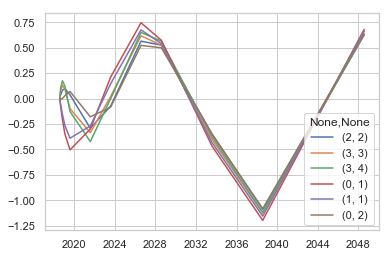

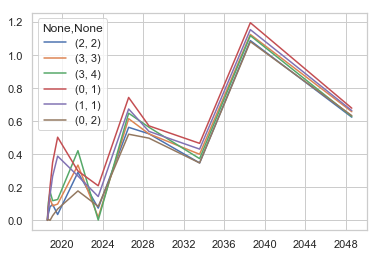

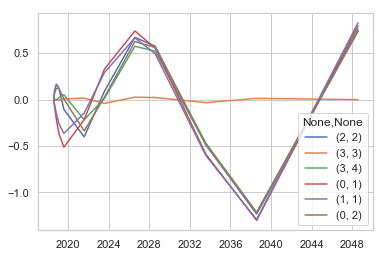

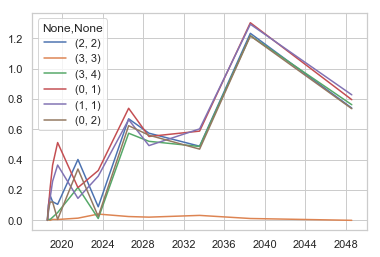

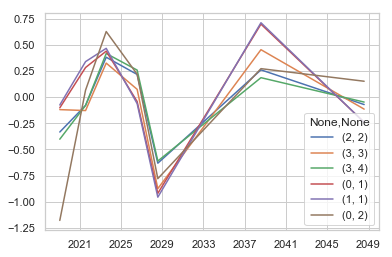

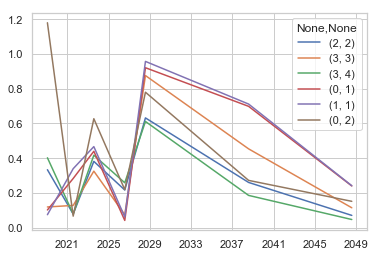

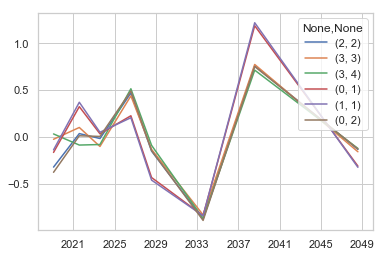

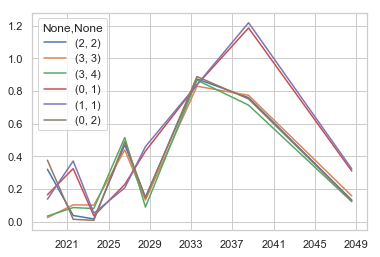

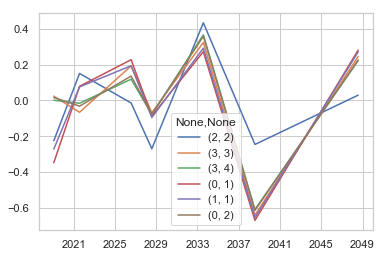

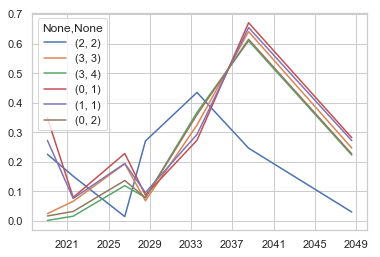

In [14]:
alt_mod_results = get_modified_results(alt_results)

df_alt = modify_result_data(alt_results)

In [63]:
def select_certain_models(df, df_alt, model_list):

    alter = lambda x: x + '_alt'
    selektor = lambda x: True if x in model_list else False
    
    df_mod_alt = df_alt[df_alt['Model'].apply(selektor)]
    df_mod_alt['Model'] = df_mod_alt['Model'].apply(alter)
    
    df_mod = df[df['Model'].apply(selektor)]

    comparison = df_mod.append(df_mod_alt)
    
    g = sns.FacetGrid(comparison, 
                      col='Error type', 
                      row='Curve', 
                      hue='Model', 
                      height=5, 
                      aspect=2.5, 
                      palette='Set1',
                      row_order=['OIS', 'Swap', 'Germany', 'France', 'Italy'])
    g = (g.map(sns.lineplot, 'Date', 'Error', marker='o').add_legend())
    plt.plot()
    

C:\Users\Miikka\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


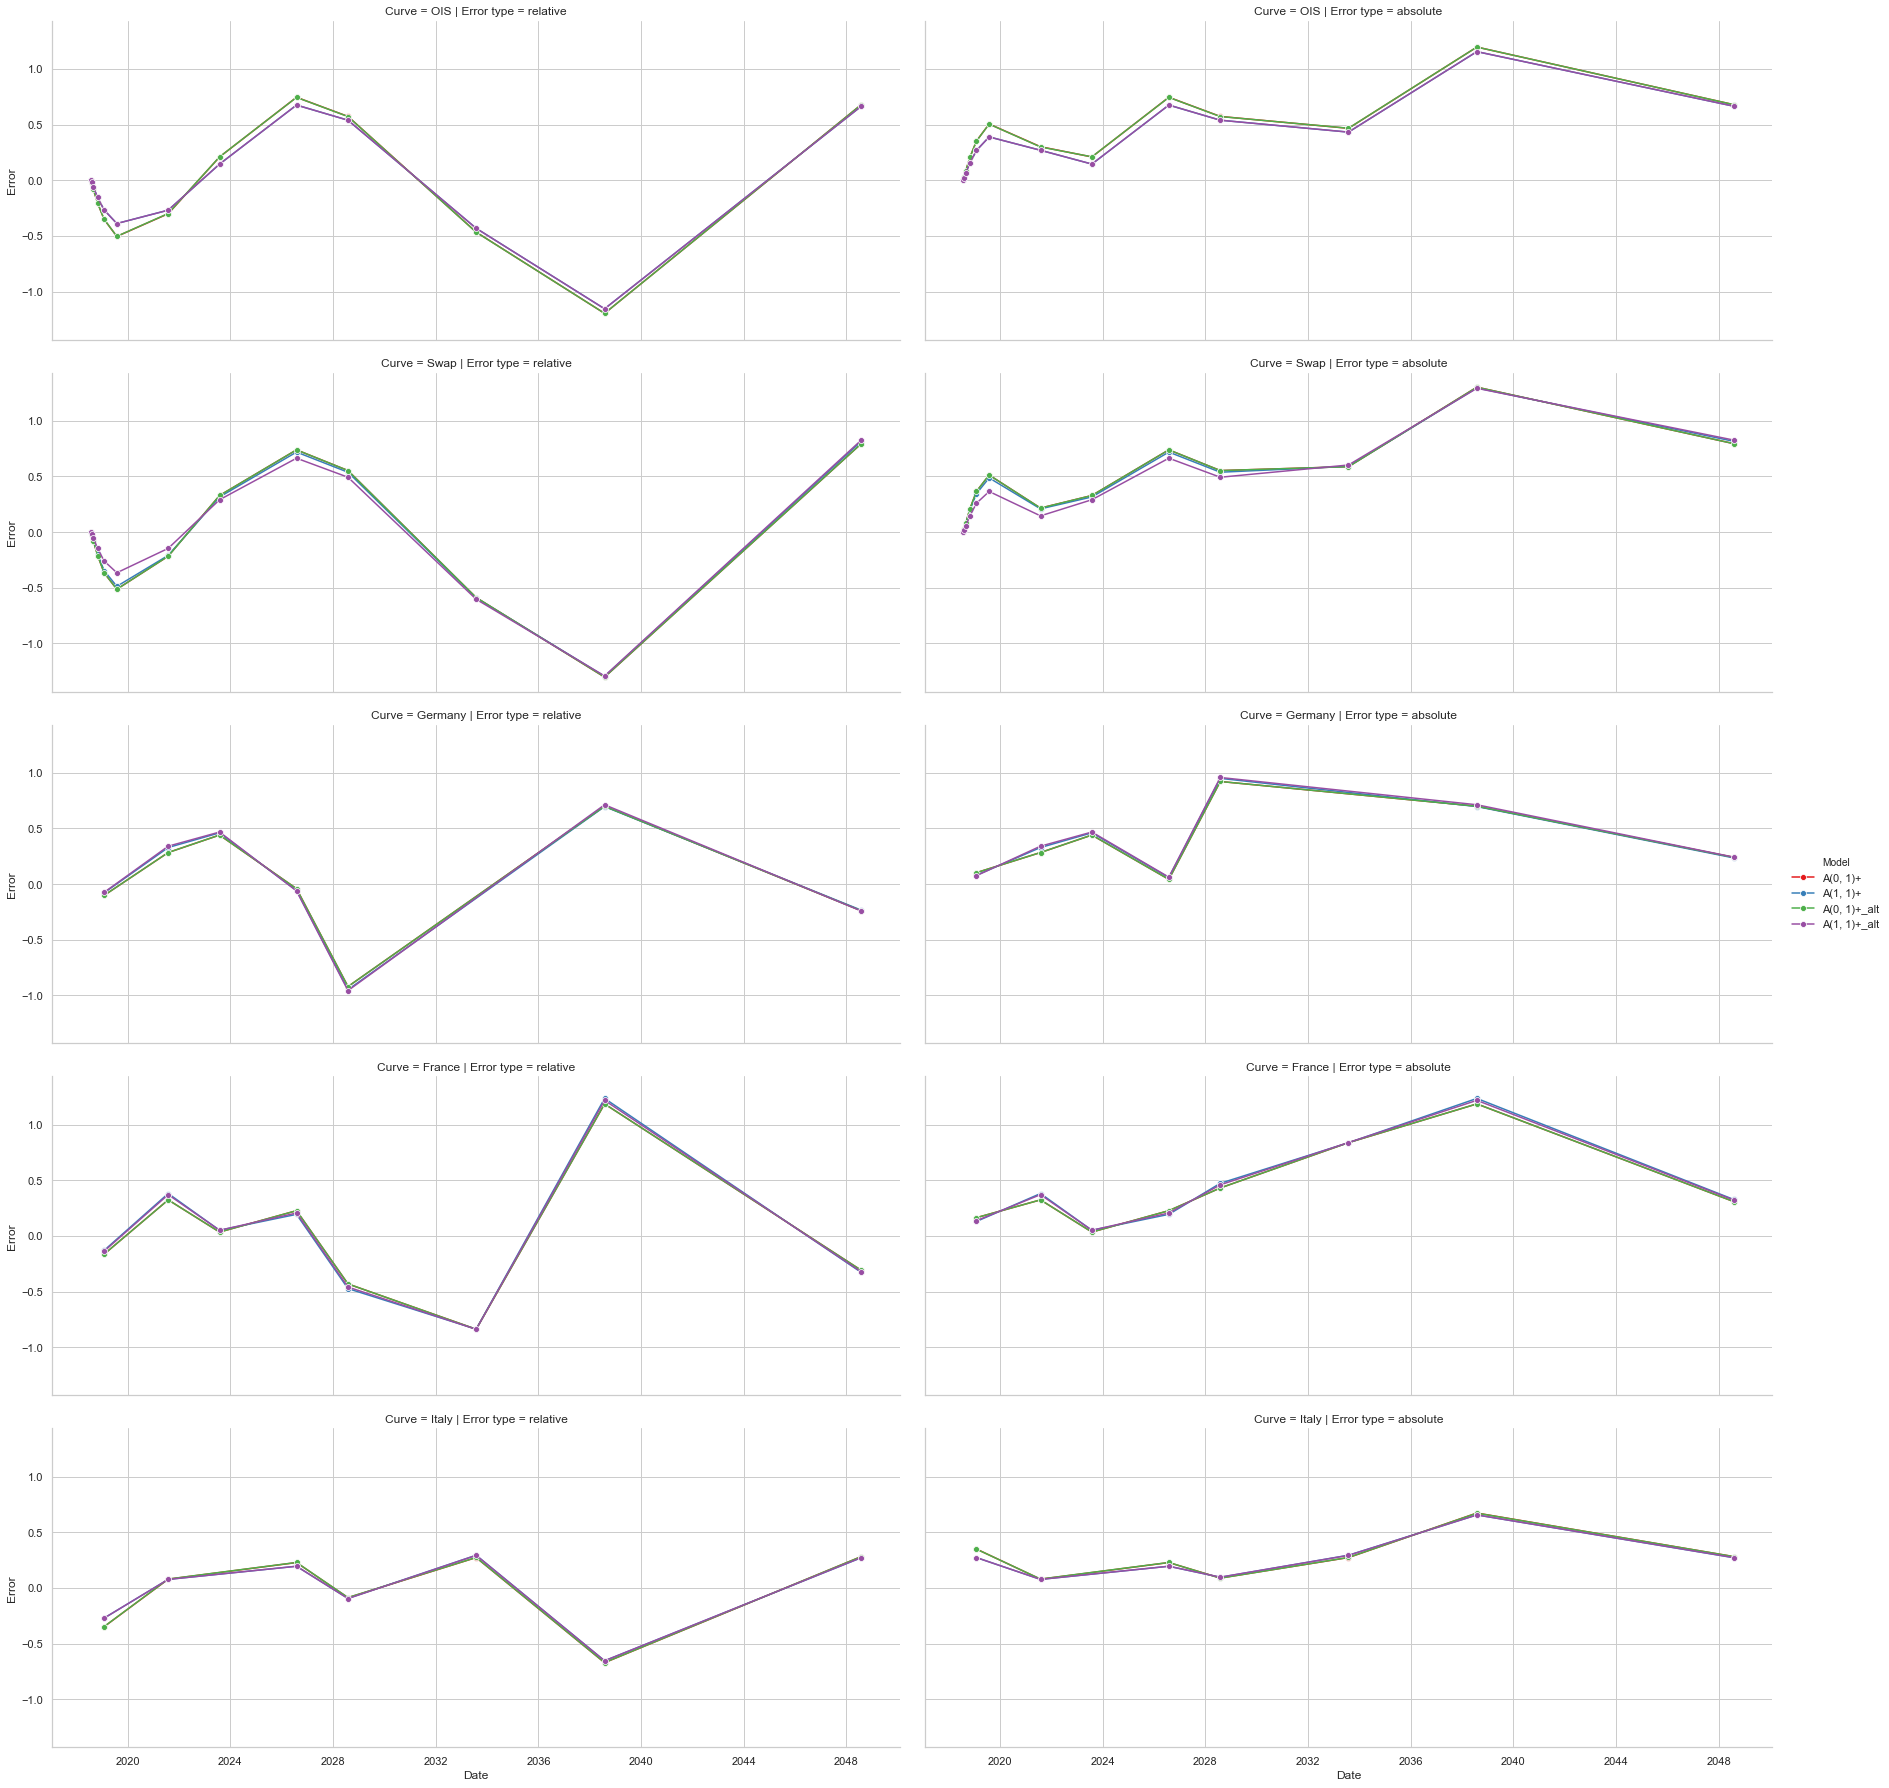

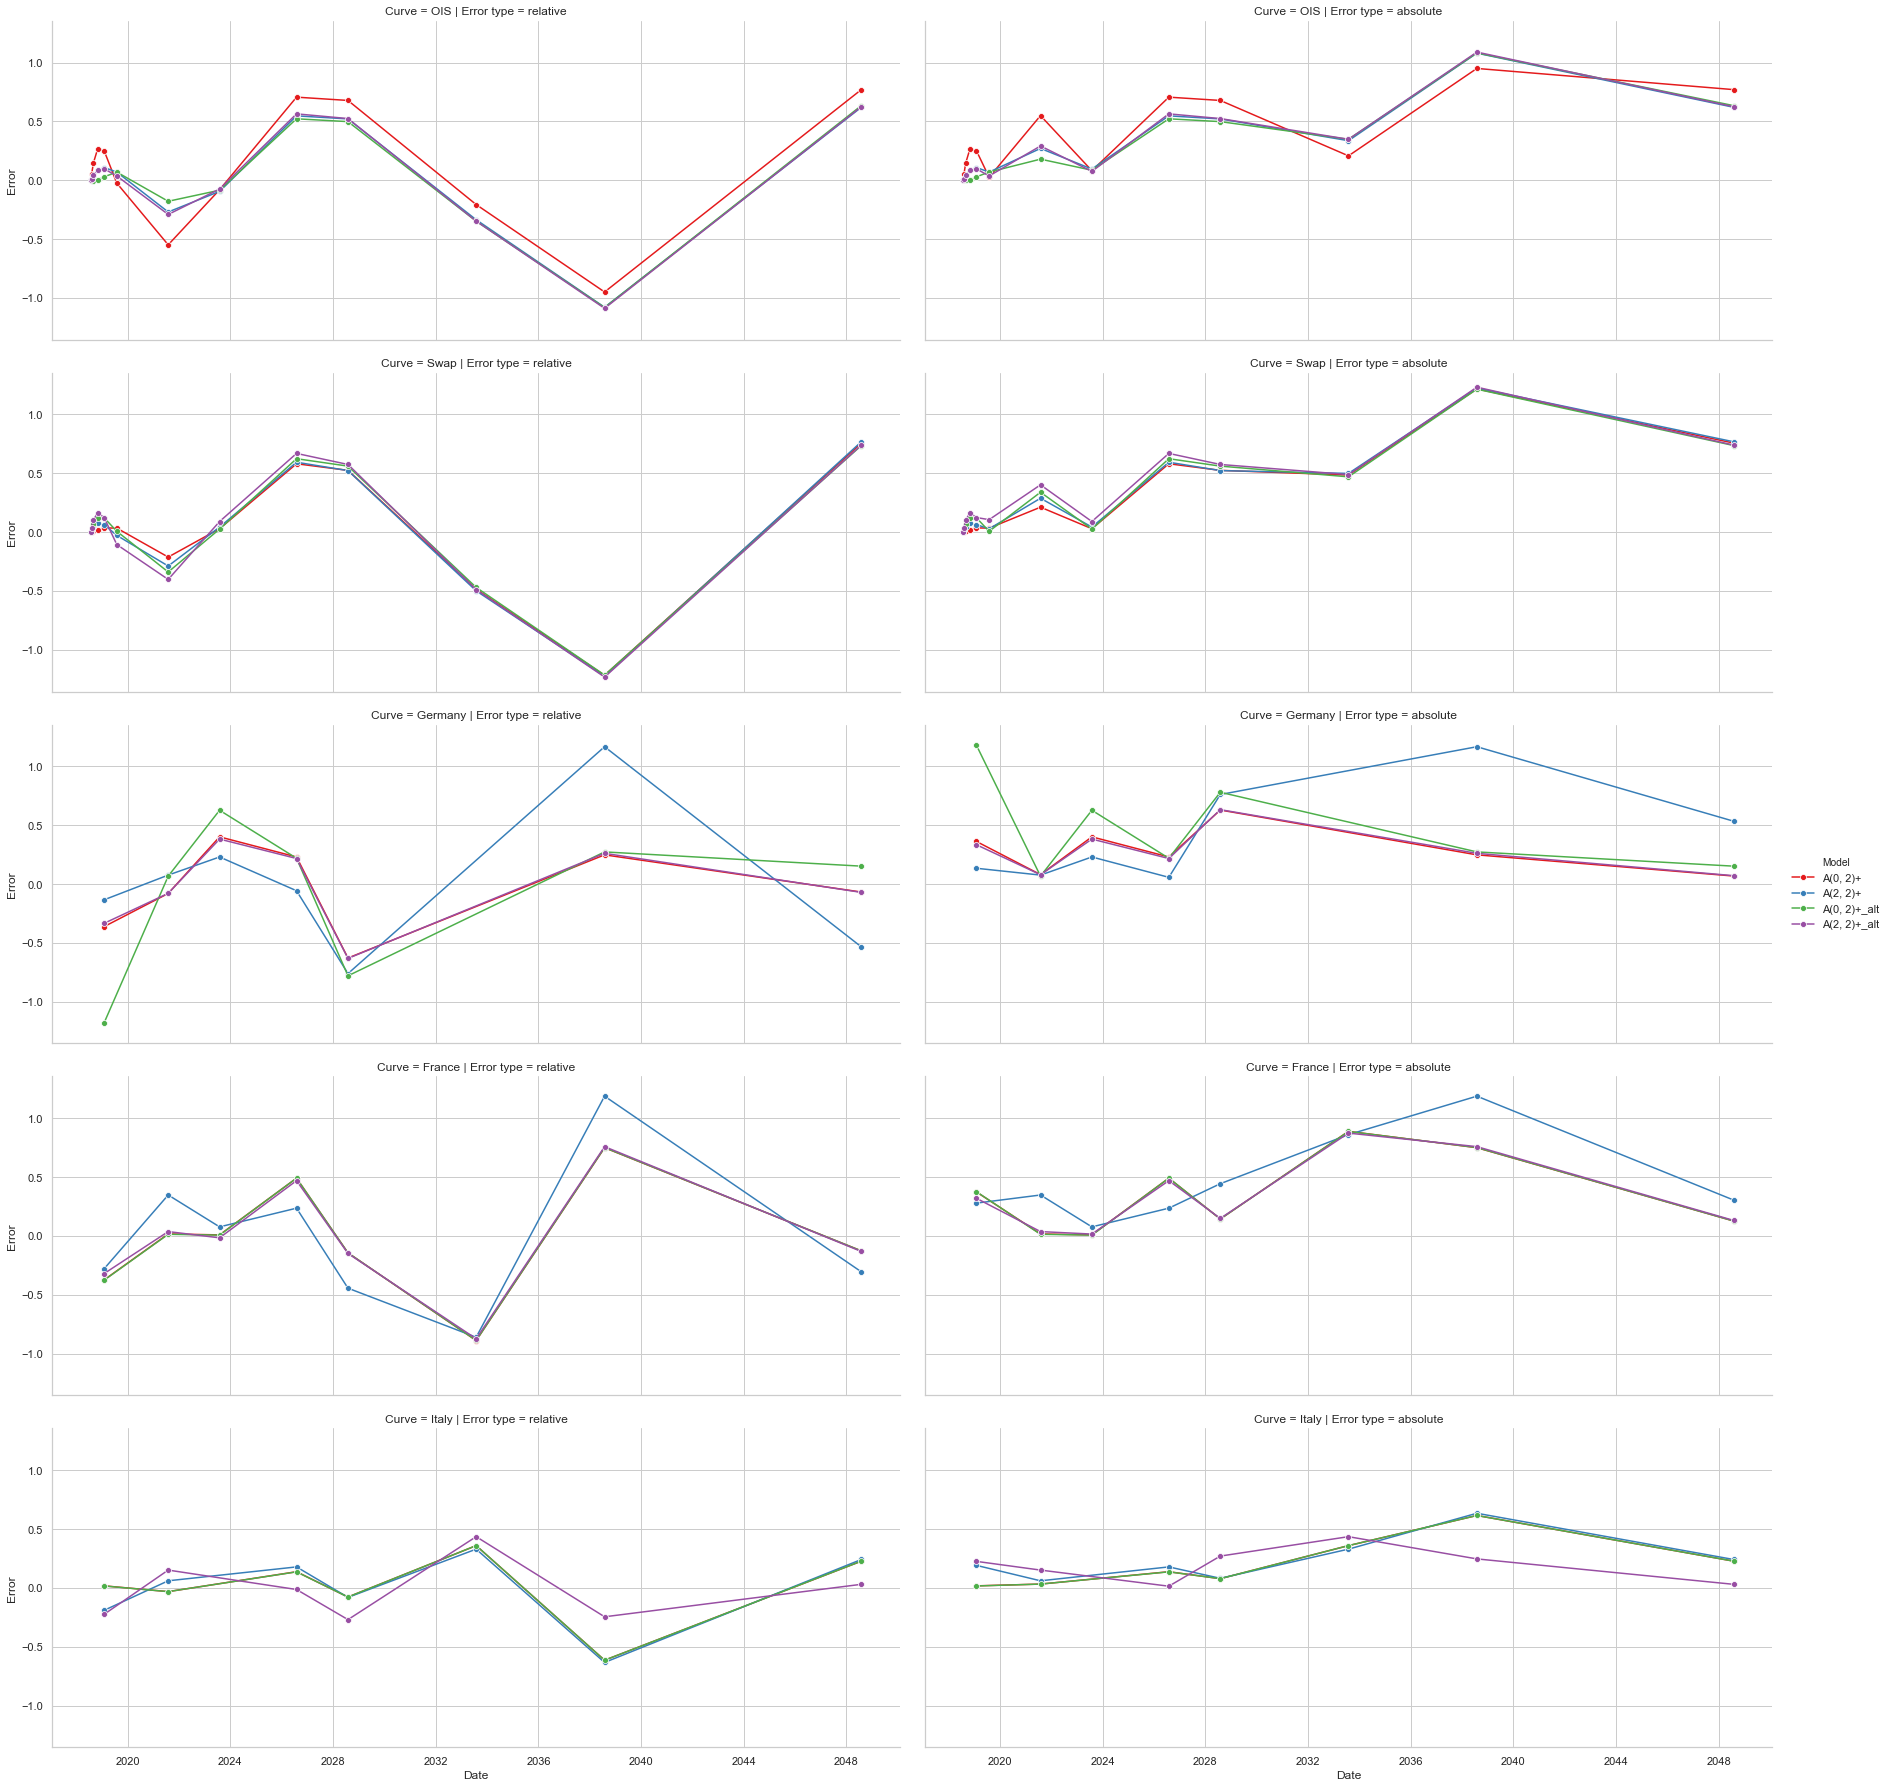

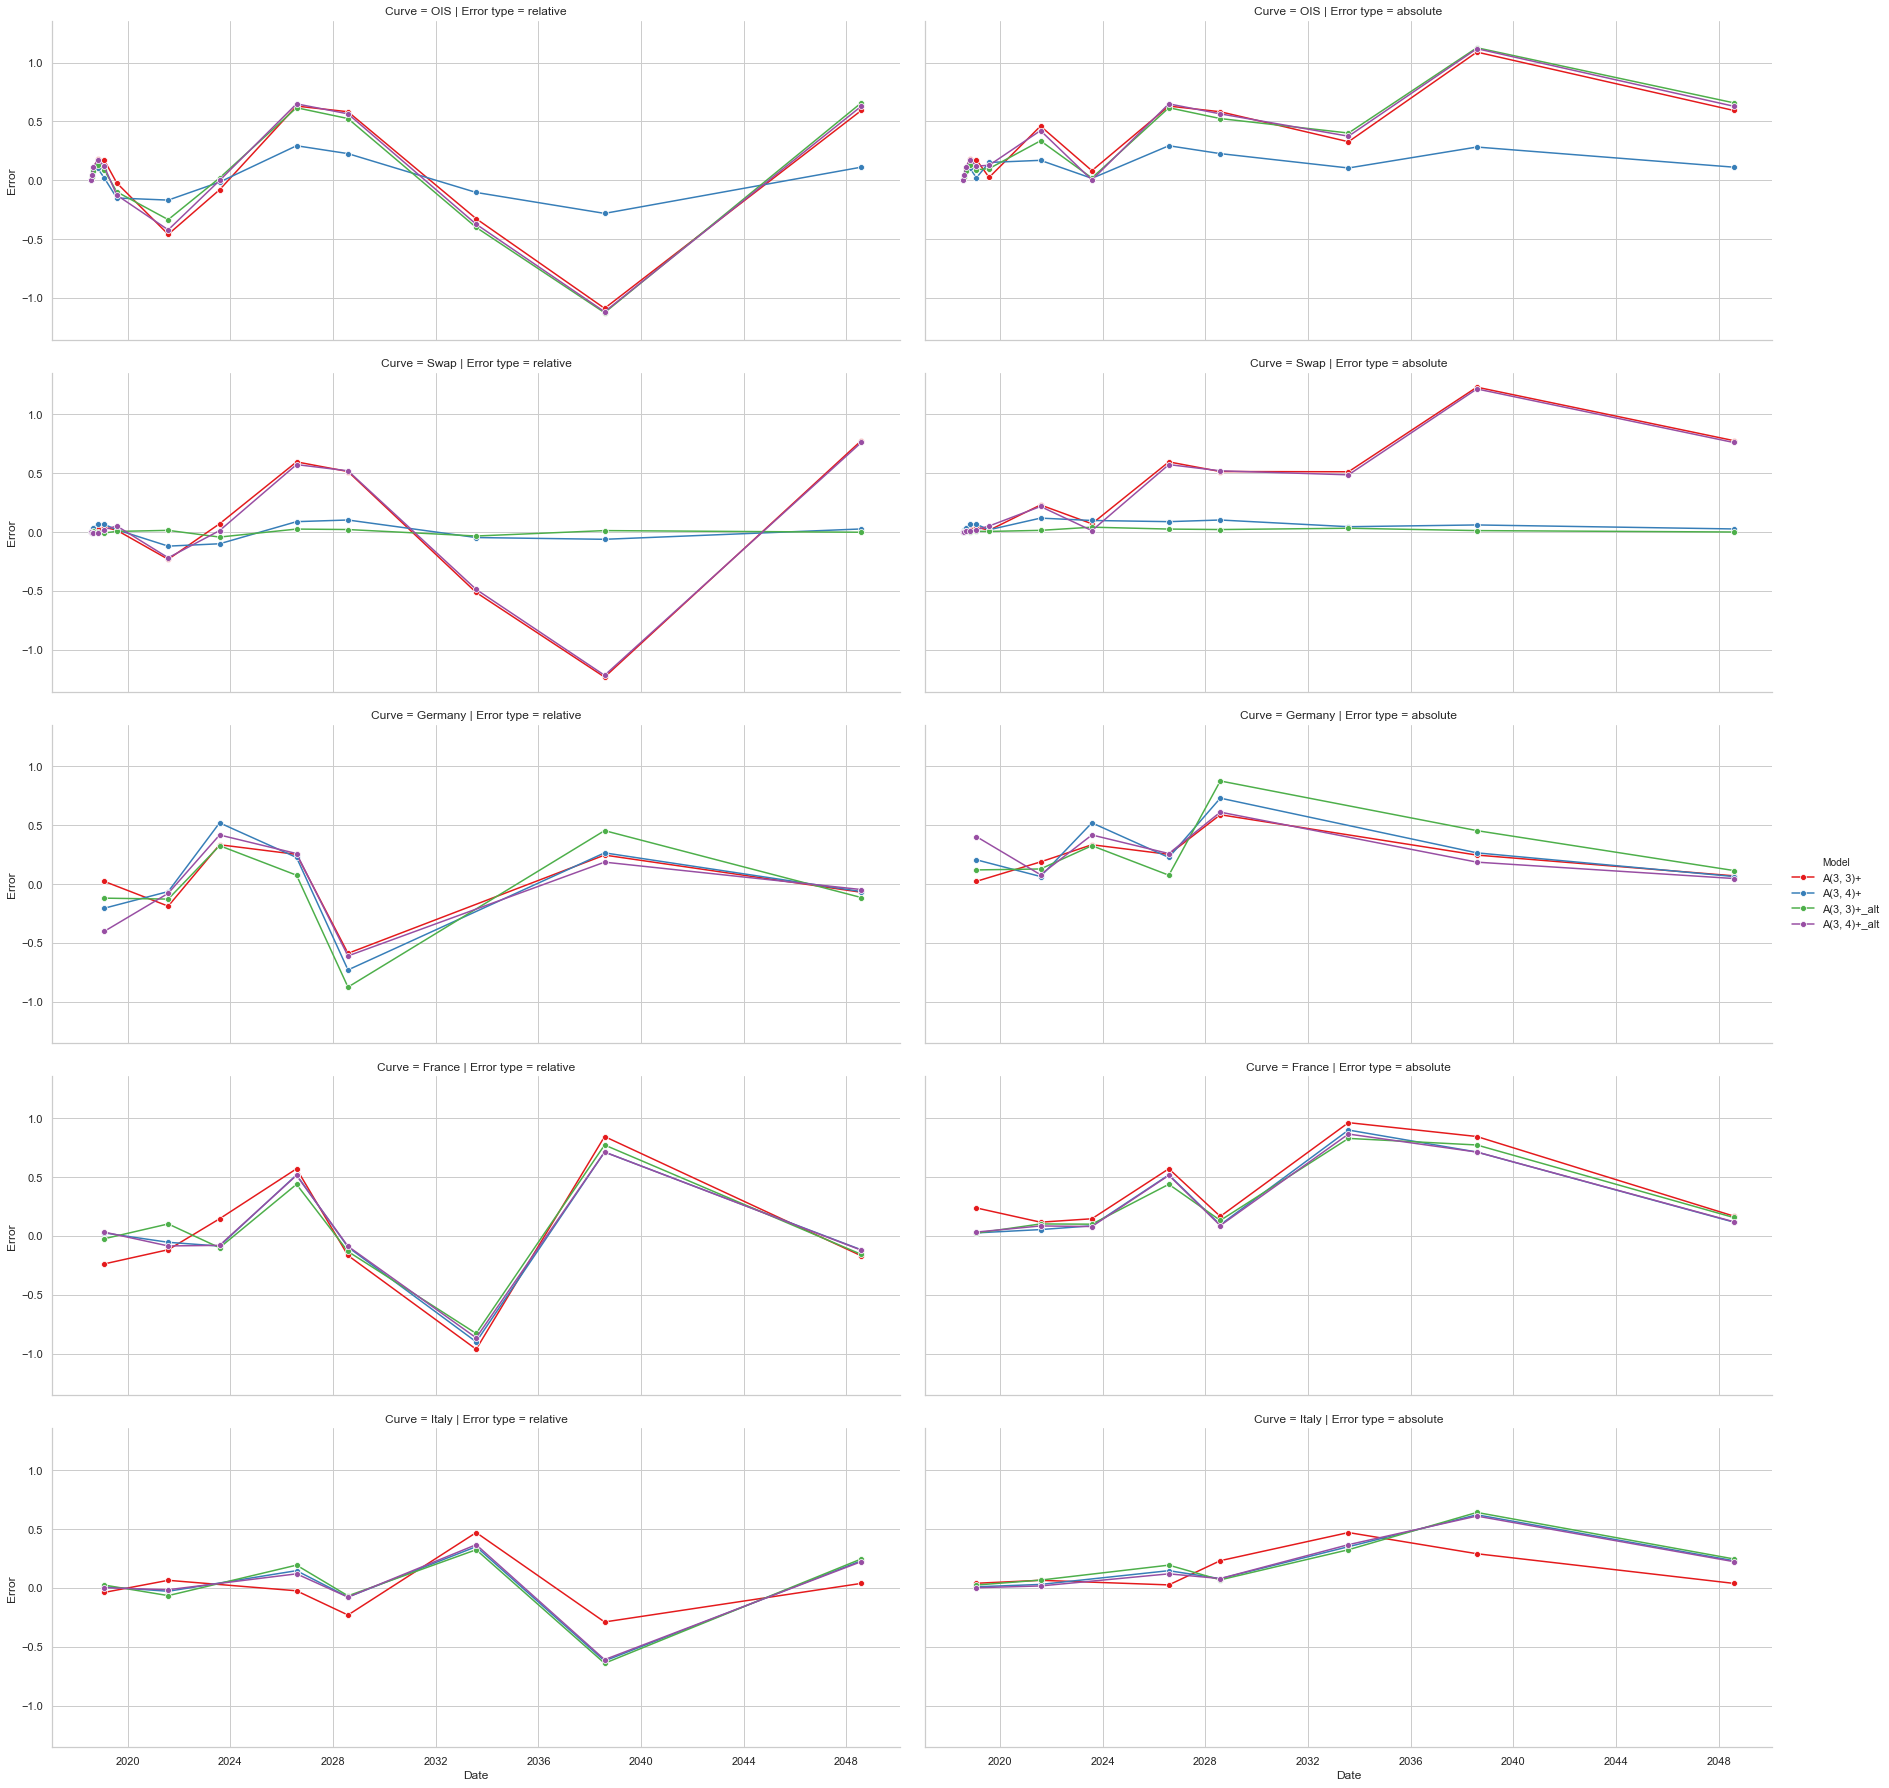

In [64]:
select_certain_models(df, df_alt, ('A(0, 1)+', 'A(1, 1)+'))
select_certain_models(df, df_alt, ('A(0, 2)+', 'A(2, 2)+'))
select_certain_models(df, df_alt, ('A(3, 3)+', 'A(3, 4)+'))


In [151]:
def make_error_comparision_df(results, alt=None):

    diff = {}

    for item in results.keys():
        item_name = renaming(item)
        diff[item_name] = {}
        for model in results[item]:
            model_name = f'A({str(model[0])}, {str(model[1])})'
            if isinstance(alt, str):
                model_name += alt
            data = results[item][model]['riskfree']['Pct abs difference'].astype(float)
            diff[item_name][model_name] = data
            
        diff[item_name] = pd.DataFrame(diff[item_name]).mean()
        
    df = pd.DataFrame(diff)
    df_mean = df.mean(axis=1)
        
    return df, df_mean.sort_values()

diff, means = make_error_comparision_df(results)
diff_alt, means_alt = make_error_comparision_df(alt_results, alt='_alt')

combined_diff = diff.append(diff_alt, sort=True)
combined_diff = combined_diff.sort_index()


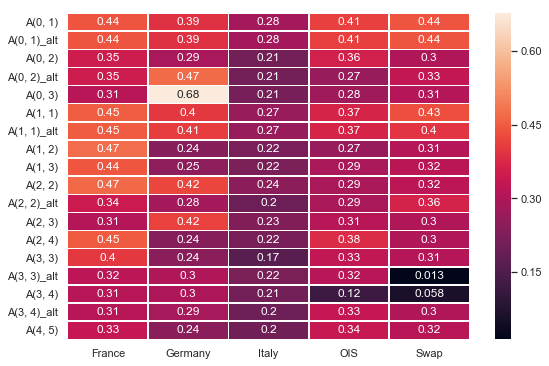

In [152]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(combined_diff, annot=True, linewidths=.5, ax=ax)

Running these calibrations took 24.48 minutes.
Absolute relative errors by models:
3  4    0.122198
1  2    0.266754
0  3    0.276932
2  2    0.291051
1  3    0.291413
2  3    0.314025
3  3    0.329254
4  5    0.338240
0  2    0.360297
1  1    0.367171
2  4    0.379554
0  1    0.410955
dtype: float64
Running these calibrations took 8.22 minutes.
Absolute relative errors by models:
0  2    0.265941
2  2    0.291381
3  3    0.316427
   4    0.333496
1  1    0.367170
0  1    0.410848
dtype: float64


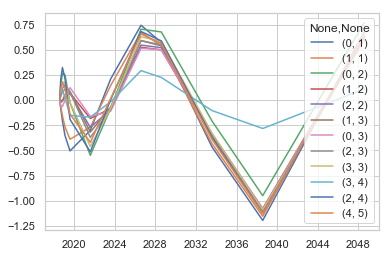

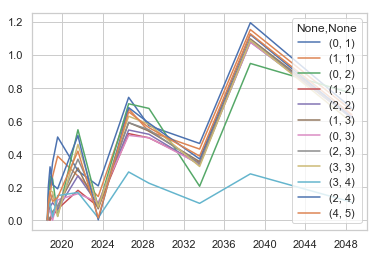

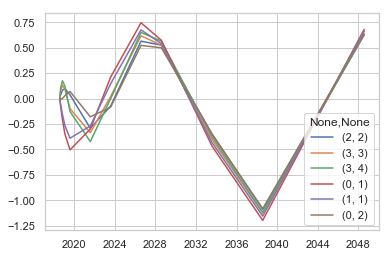

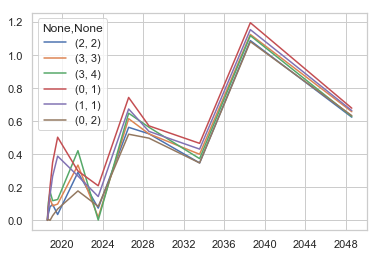

In [158]:
relative, absolute, param1, durations = analyze_models_for_item('ios', results)
relative, absolute, param2, durations = analyze_models_for_item('ios', alt_results)

In [81]:
param_comp = {}
for item in mod_results:
    param_comp[item] = {}
    for model in ['A(0, 1)+', 'A(1, 1)+', 'A(0, 2)+', 'A(2, 2)+', 'A(3, 3)+', 'A(3, 4)+']:
        param_comp[item][model] = pd.DataFrame(dict(Original=mod_results[item][model], Alternative=alt_mod_results[item][model]))
    param_comp[item] = pd.concat(param_comp[item])

for item in param_comp:
    print(item)
    print(param_comp[item].to_latex())

ios
\begin{tabular}{llll}
\toprule
         &       &               Original &            Alternative \\
\midrule
A(0, 1)+ & Y\_0 &                  -0.03 &                  -0.03 \\
         & delta &                  0.017 &                  0.017 \\
         & k &                  0.287 &                  0.286 \\
         & nu &                  0.001 &                  0.001 \\
A(0, 2)+ & Y\_0 &         [-0.046, 0.04] &           [0.04, -0.1] \\
         & delta &                   0.02 &                  0.055 \\
         & k &         [0.387, 2.362] &         [0.864, 0.481] \\
         & nu &         [0.029, 0.212] &          [0.25, 0.013] \\
         & rho &                 -0.566 &                 -0.562 \\
A(1, 1)+ & X\_0 &                  0.001 &                  0.001 \\
         & alpha &                  0.057 &                  0.057 \\
         & delta &                 -0.011 &                 -0.011 \\
         & sigma &                   0.24 &                   0.2

In [77]:
param_comp['ios']

Original            Alternative
A(0, 1)+ Y_0                    -0.03                  -0.03
         delta                  0.017                  0.017
         k                      0.287                  0.286
         nu                     0.001                  0.001
A(0, 2)+ Y_0           [-0.046, 0.04]           [0.04, -0.1]
         delta                   0.02                  0.055
         k             [0.387, 2.362]         [0.864, 0.481]
         nu            [0.029, 0.212]          [0.25, 0.013]
         rho                   -0.566                 -0.562
A(1, 1)+ X_0                    0.001                  0.001
         alpha                  0.057                  0.057
         delta                 -0.011                 -0.011
         sigma                   0.24                   0.24
         theta                    0.1                    0.1
A(2, 2)+ X_0            [0.001, 0.08]         [0.059, 0.022]
         alpha         [0.444, 0.703]         [0.807, 0.416]
         delta                  -0.08                 -0.079
         sigma         [0.118, 0.247]          [0.12, 0.103]
         theta             [0.1, 0.0]           [0.0, 0.099]
A(3, 3)+ X_0    [0.017, 0.007, 0.031]   [0.037, 0.03, 0.001]
         alpha  [2.173, 0.185, 1.918]  [2.989, 2.964, 0.111]
         delta                 -0.046                  -0.06
         sigma  [0.185, 0.249, 0.001]    [0.25, 0.175, 0.25]
         theta    [0.0, 0.075, 0.016]  [0.023, 0.021, 0.073]
A(3, 4)+ X_0     [0.02, 0.084, 0.072]   [0.004, 0.07, 0.079]
         Y_0                     -0.1                 -0.099
         alpha  [1.827, 2.999, 1.103]    [0.252, 2.995, 3.0]
         delta                 -0.068                 -0.044
         k                      0.059                  2.999
         nu                     0.024                  0.019
         sigma   [0.046, 0.25, 0.245]   [0.181, 0.001, 0.25]
         theta   [0.085, 0.023, 0.05]   [0.05, 0.016, 0.004]

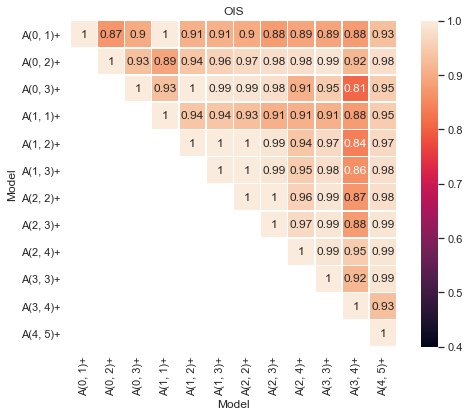

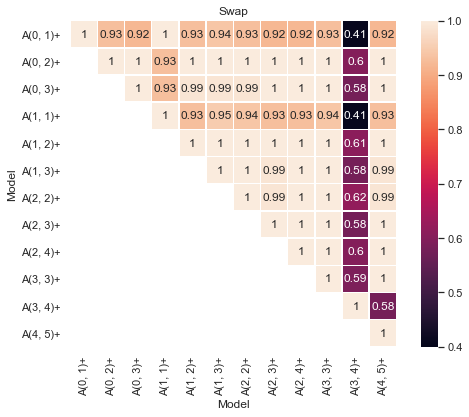

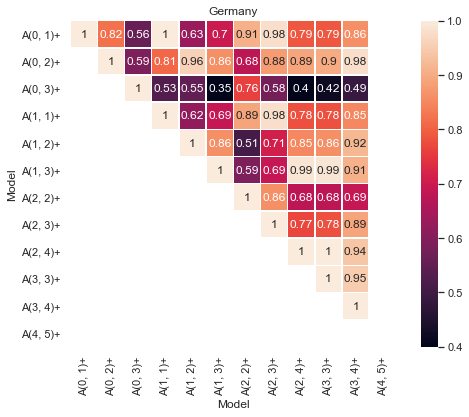

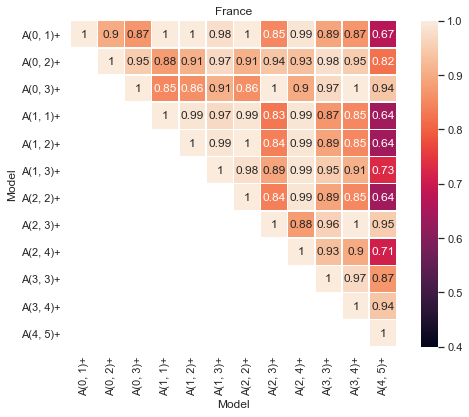

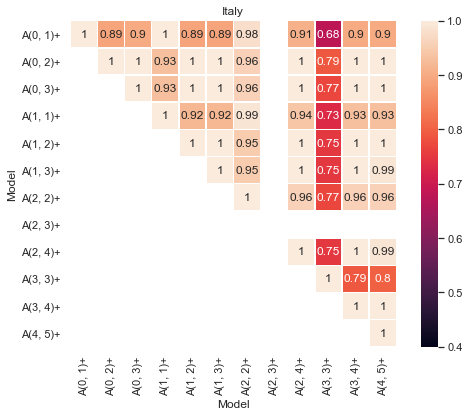

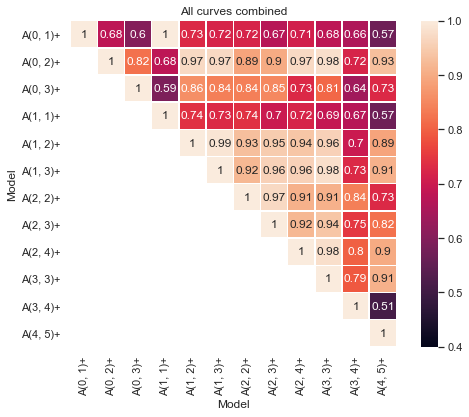

In [52]:
error_df = df[df['Error type'] == 'relative'].pivot_table(index=['Curve', 'Date'], columns='Model', aggfunc=np.mean)
error_df.columns = error_df.columns.droplevel()

error_df_all = df[df['Error type'] == 'relative'].pivot_table(index='Date', columns='Model', aggfunc=np.mean)
error_df_all.columns = error_df_all.columns.droplevel()

for curve in ['OIS', 'Swap', 'Germany', 'France', 'Italy']:
    correlation_heatmap(error_df.loc[curve], title=curve, vmin=0.4)
    
correlation_heatmap(error_df_all, title='All curves combined', vmin=0.4)

51.91


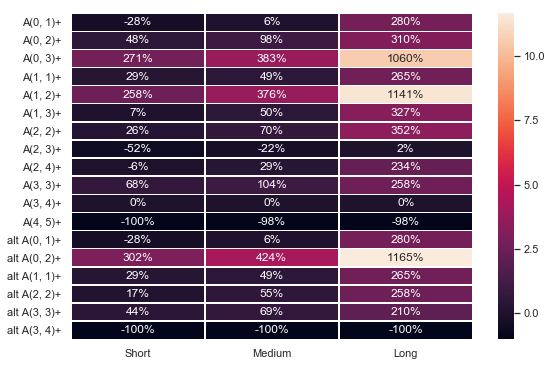

In [102]:
tomorrow = today + datetime.timedelta(days=1)
coupon_dates = [datetime.date(tomorrow.year+i, tomorrow.month, tomorrow.day) for i in range(1,30)]
cap_to_price1 = Cap(coupon_dates=coupon_dates[:-1], maturity=coupon_dates[-1], strike_rate=0.005)
cap_to_price2 = Cap(coupon_dates=coupon_dates[:9], maturity=coupon_dates[10], strike_rate=0)
cap_to_price3 = Cap(coupon_dates=coupon_dates[:1], maturity=coupon_dates[2], strike_rate=-0.01)
pricer = SimplePricer(today)

curve = 'ios'

short = {}
medium = {}
long = {}
start = time.time()

for model in results[curve]:
    params = results[curve][model]['param']
    model_name = f'A({str(model[0])}, {str(model[1])})+'
    short[model_name] = pricer.price(cap_to_price1, **params)
    medium[model_name] = pricer.price(cap_to_price2, **params)
    long[model_name] = pricer.price(cap_to_price3, **params)
    
for model in alt_results[curve]:
    params = alt_results[curve][model]['param']
    model_name = f'alt A({str(model[0])}, {str(model[1])})+'
    short[model_name] = pricer.price(cap_to_price1, **params)
    medium[model_name] = pricer.price(cap_to_price2, **params)
    long[model_name] = pricer.price(cap_to_price3, **params)
    
end = time.time()
print(round(end-start, 2))

prices = pd.DataFrame(dict(Short=short, Medium=medium, Long=long))
baseline = prices.loc['A(3, 4)+']
relative = (prices - baseline) / baseline
relative = relative.round(3)
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(relative, annot=True, linewidths=.5, fmt='.0%', ax=ax)

48.88


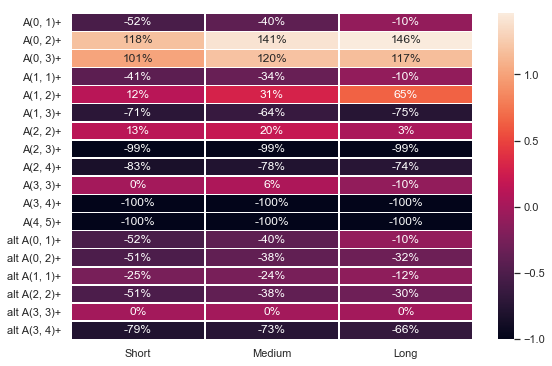

In [103]:
curve = 'swap'

short = {}
medium = {}
long = {}
start = time.time()

for model in results[curve]:
    params = results[curve][model]['param']
    model_name = f'A({str(model[0])}, {str(model[1])})+'
    short[model_name] = pricer.price(cap_to_price1, **params)
    medium[model_name] = pricer.price(cap_to_price2, **params)
    long[model_name] = pricer.price(cap_to_price3, **params)
    
for model in alt_results[curve]:
    params = alt_results[curve][model]['param']
    model_name = f'alt A({str(model[0])}, {str(model[1])})+'
    short[model_name] = pricer.price(cap_to_price1, **params)
    medium[model_name] = pricer.price(cap_to_price2, **params)
    long[model_name] = pricer.price(cap_to_price3, **params)
    
end = time.time()
print(round(end-start, 2))

prices = pd.DataFrame(dict(Short=short, Medium=medium, Long=long))
baseline = prices.loc['alt A(3, 3)+']
relative = (prices - baseline) / baseline
relative = relative.round(3)
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(relative, annot=True, linewidths=.5, fmt='.0%', ax=ax)

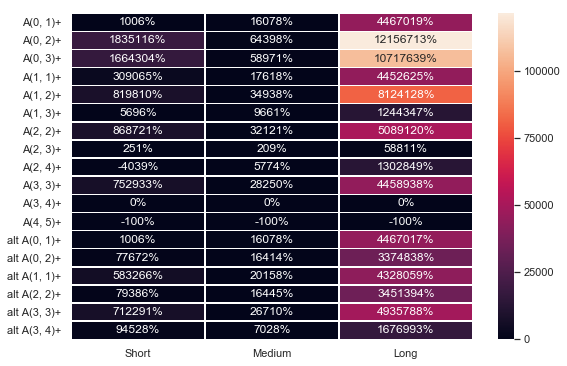

In [96]:
prices = pd.DataFrame(dict(Short=short, Medium=medium, Long=long))
baseline = prices.loc['A(3, 4)+']
relative = (prices - baseline) / baseline
relative = relative.round(3)
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(relative, annot=True, linewidths=.5, fmt='.0%', ax=ax)

In [97]:
prices

Short        Medium          Long
A(0, 1)+      6.246097e-04  1.195617e-01  2.546053e-02
A(0, 2)+      1.035966e+00  4.766580e-01  6.928826e-02
A(0, 3)+      9.395433e-01  4.365500e-01  6.108620e-02
A(1, 1)+      1.745214e-01  1.309369e-01  2.537849e-02
A(1, 2)+      4.628332e-01  2.589391e-01  4.630437e-02
A(1, 3)+      3.271991e-03  7.213897e-02  7.092776e-03
A(2, 2)+      4.904430e-01  2.381192e-01  2.900622e-02
A(2, 3)+      1.980364e-04  2.282582e-03  3.357659e-04
A(2, 4)+     -2.223660e-03  4.340643e-02  7.426211e-03
A(3, 3)+      4.250814e-01  2.095157e-01  2.541447e-02
A(3, 4)+      5.644924e-05  7.390262e-04  5.699541e-07
A(4, 5)+     -2.830707e-09  2.201151e-09  3.758315e-10
alt A(0, 1)+  6.246043e-04  1.195617e-01  2.546052e-02
alt A(0, 2)+  4.390179e-02  1.220444e-01  1.923560e-02
alt A(1, 1)+  3.293054e-01  1.497122e-01  2.466852e-02
alt A(2, 2)+  4.486955e-02  1.222726e-01  1.967193e-02
alt A(3, 3)+  4.021396e-01  1.981350e-01  2.813230e-02
alt A(3, 4)+  5.341680e-02  5.267644e-02  9.558662e-03

In [8]:
ios.data

{datetime.date(2018, 7, 27): -0.366,
 datetime.date(2018, 8, 6): -0.3558,
 datetime.date(2018, 8, 30): -0.3632,
 datetime.date(2018, 10, 30): -0.3619,
 datetime.date(2019, 1, 30): -0.3615,
 datetime.date(2019, 7, 30): -0.3577,
 datetime.date(2021, 7, 30): -0.1549,
 datetime.date(2023, 7, 31): 0.1219,
 datetime.date(2026, 7, 30): 0.4841,
 datetime.date(2028, 7, 31): 0.7062,
 datetime.date(2033, 7, 29): 1.0862,
 datetime.date(2038, 7, 30): 1.2774,
 datetime.date(2048, 7, 30): 1.3653}

In [9]:
swap.data

{datetime.date(2018, 7, 27): -0.43,
 datetime.date(2018, 8, 6): -0.4094,
 datetime.date(2018, 8, 30): -0.3728,
 datetime.date(2018, 10, 30): -0.3065,
 datetime.date(2019, 1, 30): -0.2757,
 datetime.date(2019, 7, 30): -0.2573,
 datetime.date(2021, 7, 30): -0.01,
 datetime.date(2023, 7, 31): 0.3058,
 datetime.date(2026, 7, 30): 0.7073,
 datetime.date(2028, 7, 31): 0.9302,
 datetime.date(2033, 7, 29): 1.306,
 datetime.date(2038, 7, 30): 1.4841,
 datetime.date(2048, 7, 30): 1.5502}